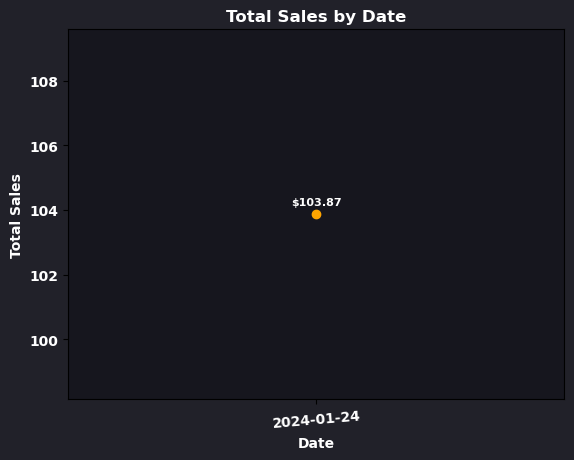

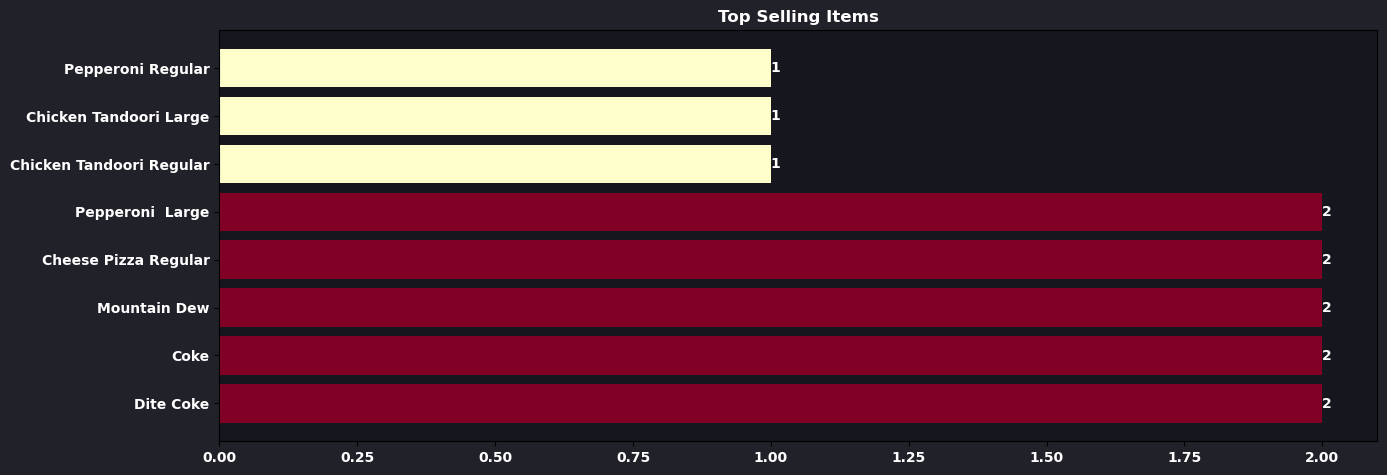

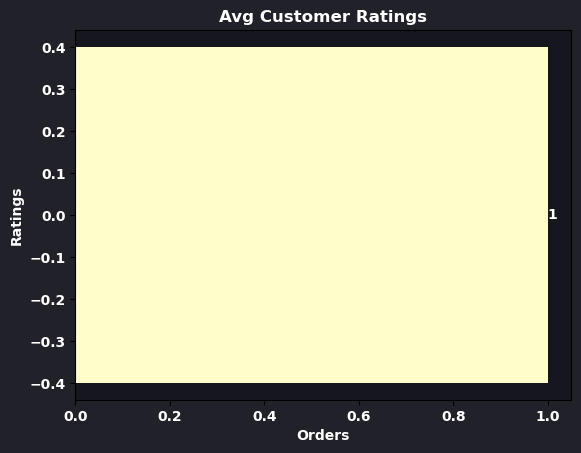

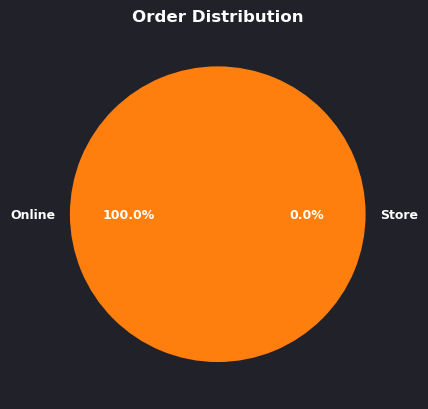

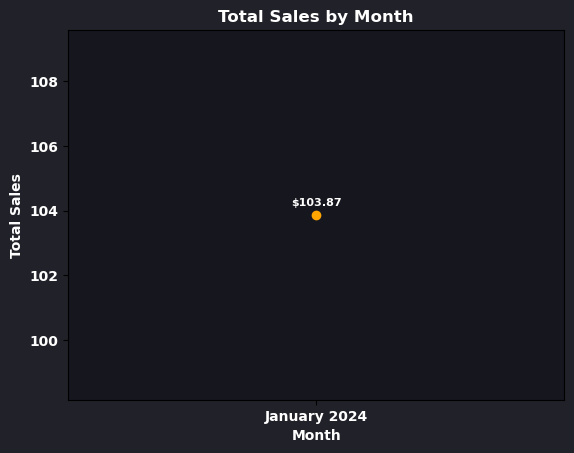

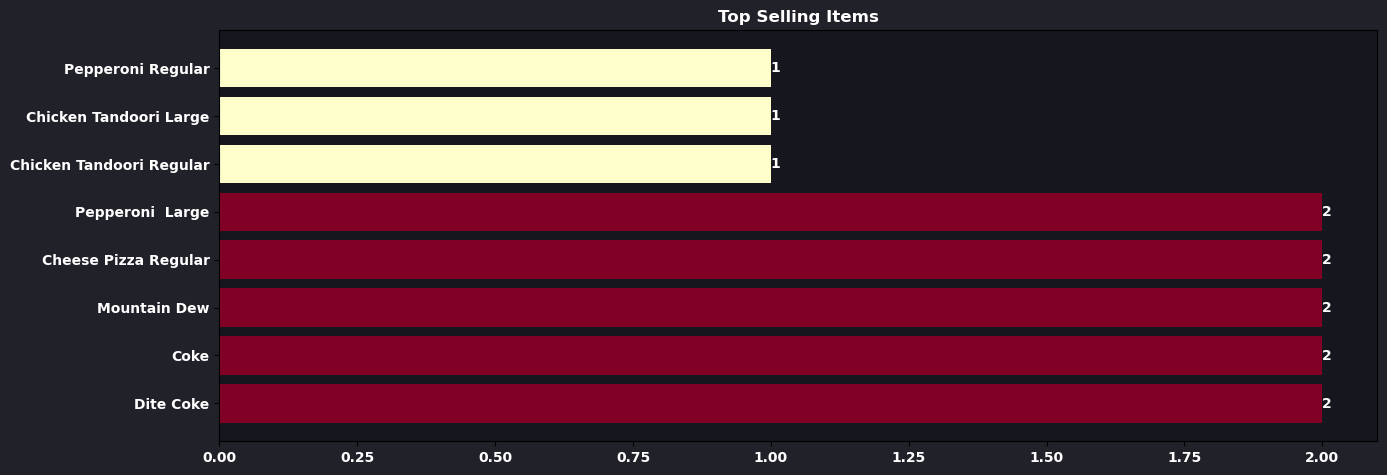

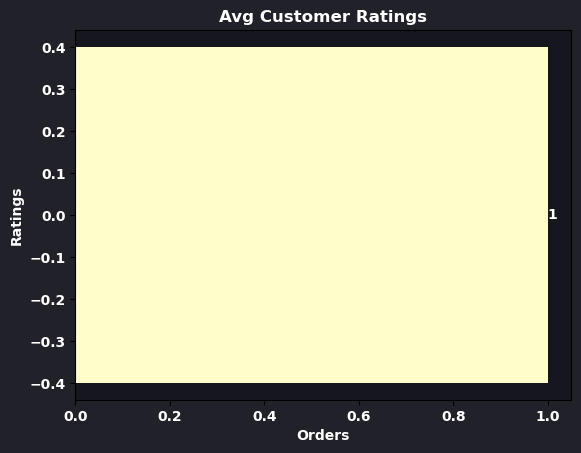

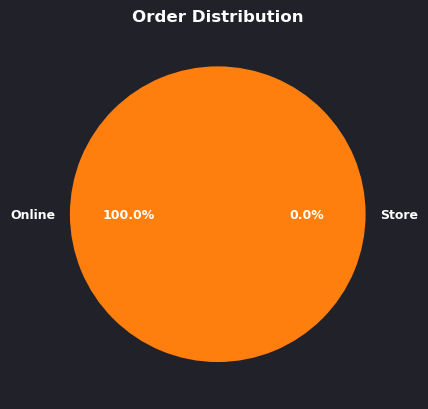

In [7]:
# LOGIN
class LoginPage:
    def __init__(self):
        self.main_window = tk.Tk()
        self.main_window.attributes('-fullscreen', True)
        self.main_window.title("Pizza Billing System - Login")

        img222 = Image.open("LOGIN.jpg")
        screen_width = self.main_window.winfo_screenwidth()
        screen_height = self.main_window.winfo_screenheight()
        img222 = img222.resize((screen_width, screen_height))
        self.BGG = ImageTk.PhotoImage(img222)
        self.imageL = tk.Label(self.main_window, image=self.BGG)
        self.imageL.place(x=0, y=0)
        # Main Label
        self.store_label = tk.Label(self.main_window, text="The Charcoal Pizza Store",
                                    font=("Times New Roman", 54, "bold"), bg="#161513",fg="white")
        self.store_label.place(relx=0.25, rely=0.01)

        self.top_frame = tk.Frame(self.main_window, highlightthickness=2, highlightbackground="#161513", bg="#161513")
        self.middle_frame = tk.Frame(self.main_window, highlightthickness=2, highlightbackground="#161513", bg="#161513")
        self.middle111_frame = tk.Frame(self.middle_frame, bg="#161513", relief="flat")
        self.middle11_frame = tk.Frame(self.middle_frame,bg="#161513",relief="flat")
        self.bottom_frame = tk.Frame(self.main_window, highlightthickness=2, highlightbackground="#161513", bg="#161513")
        self.BBottom_frame = tk.Frame(self.main_window, highlightthickness=2, highlightbackground="#161513", bg="#161513")
        # create username label and entry
        self.username_label = tk.Label(self.top_frame, text="Username:", font=("Arial", 15, "bold"),fg="white", bg="#161513")
        self.username_label.pack(side="left", pady=10)
        self.username_entry = tk.Entry(self.top_frame, font=("Arial", 15, "bold"))
        self.username_entry.pack(side="left", pady=10)
        # create password label and entry
        self.password_label = tk.Label(self.middle111_frame, text="Password:", font=("Arial", 15, "bold"), bg="#161513",fg="white")
        self.password_label.pack(side="left", pady=10)
        self.password_entry = tk.Entry(self.middle111_frame, show="*", font=("Arial", 15, "bold"))
        self.password_entry.pack(side="left", pady=10)
        # create forgot password label
        self.forgot_password_label = tk.Label(self.middle11_frame, text="Forgot Password?",
                                              font=("Arial", 12, "underline"), fg="lightblue", bg="#161513", cursor="hand2")
        self.forgot_password_label.pack(side="bottom", anchor="sw")
        self.forgot_password_label.bind("<Button-1>", lambda event: self.forgot_password())

        #Admin
        self.admin_button = tk.Button(self.BBottom_frame, text="AdminLogin", height=2, width=15,
                                      font=("Arial", 15, "bold"), command=self.adminlogin,fg="#161513",bg="#faf0e6")
        self.admin_button.pack()


        # create login button
        self.login_button = tk.Button(self.bottom_frame, text="Login", height=2, width=15, bg="#faf0e6",
                                      font=("Arial", 15, "bold"), command=self.login,fg="#161513")
        self.login_button.grid(row=1, column=0, padx=(0, 0))  # add extra padding to the right
        # create signup button
        self.signup_button = tk.Button(self.bottom_frame, text="Sign Up", height=2, width=15, bg="#faf0e6",
                                       font=("Arial", 15, "bold"), command=self.signup,fg="#161513")
        self.signup_button.grid(row=1, column=1, padx=(0, 0))  # add extra padding to the left
        # Packing the frmes
        self.top_frame.place(relx=0.5, rely=0.3, anchor=tkinter.CENTER)
        self.middle_frame.place(relx=0.5, rely=0.4, anchor=tkinter.CENTER)
        self.middle111_frame.pack()
        self.middle11_frame.pack()
        self.bottom_frame.place(relx=0.5, rely=0.5, anchor=tkinter.CENTER)
        self.BBottom_frame.place(relx=0.5, rely=0.6, anchor=tkinter.CENTER)
        #close BUtton
        self.close_button = tk.Button(self.main_window, text="Close", command=self.close, width=10, fg="white",
                                      font=("Arial", 15, "bold"), bg="red")
        self.close_button.place(relx=0.9, rely=0.9, anchor=tk.CENTER)

        tk.mainloop()

    def close(self):  # closing the application
        self.main_window.destroy()

    def adminlogin(self):

        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        # Perform database operations
        cursor = mydb.cursor()
        # fetch stored credentials from the database
        cursor.execute("SELECT Username, Password FROM EmployeeInformation")
        stored_credentials = cursor.fetchall()

        entered_username = self.username_entry.get().strip()
        entered_password = hashlib.sha256(self.password_entry.get().strip().encode()).hexdigest()

        for username, password in stored_credentials:
            if username == entered_username and password == entered_password:
                cursor.execute("SELECT employee_id, CONCAT(Last_Name, ', ', First_Name, ' ', Middle_Name) AS full_name FROM EmployeeInformation WHERE Username = %s",
                     (entered_username,))

                result = cursor.fetchone()
                employee_id = result[0]
                full_name = result[1]
                # if username and password match, go to main menu
                self.main_window.destroy()
                EmpMenu(employee_id, full_name)
                return
        # if username and password do not match, show error message
        error_message = tk.Label(self.main_window, text="Error: Invalid username or password.")
        error_message.pack()

        mydb.close()

    def login(self):

        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        # Perform database operations
        cursor = mydb.cursor()

        # fetch stored credentials from the database
        cursor.execute("SELECT Username, Password FROM CustomersInformation")
        stored_credentials = cursor.fetchall()

        entered_username = self.username_entry.get().strip()
        entered_password = hashlib.sha256(self.password_entry.get().strip().encode()).hexdigest()

        for username, password in stored_credentials:
            if username == entered_username and password == entered_password:
                cursor.execute(
                    "SELECT Customer_ID, CONCAT(Last_Name, ', ', First_Name, ' ', Middle_Name) AS full_name FROM CustomersInformation WHERE Username = %s",
                    (entered_username,)
                )

                result = cursor.fetchone()
                customer_id = result[0]
                full_name = result[1]
                # if username and password match, go to main menu
                self.main_window.destroy()
                MainMenu(customer_id, full_name)
                return
        # if username and password do not match, show error message
        tk.messagebox.showerror("Invaid Credentials","Invalid username or password")


        mydb.close()

    def signup(self):
        self.main_window.destroy()
        SignUpPage()

    # FORGOT PASSWORD
    def forgot_password(self):

        self.forgot_window  = tk.Toplevel(self.main_window)
        self.forgot_window.title("Forgot Password")
        self.forgot_window.configure(background='#161513')
        self.forgot_window.geometry("400x600")
        # rest of your code here

        self.forframe = tk.Frame(self.forgot_window,bg="#161513")
        self.forframe.pack()
        self.forframe1 = tk.Frame(self.forgot_window,bg="#161513")
        self.forframe1.pack()
        email_label = tk.Label(self.forframe, text="Enter your email address:", font=("Arial", 15, "bold"),bg="#161513",fg="white")
        email_label.pack(pady=10)
        email_entry = tk.Entry(self.forframe, font=("Arial", 15, "bold"))
        email_entry.pack(pady=10)


        submit_button = tk.Button(self.forframe, text="Submit", font=("Arial", 15, "bold"),bg="green",fg="white",
                                  command=lambda: self.send_otp(email_entry.get()))
        submit_button.pack(pady=10)
        close_button = tk.Button(self.forframe, text="Close", font=("Arial", 15, "bold"), bg="green", fg="white",
                                  command=self.forgot_window.destroy)
        close_button.pack(pady=10)



    def send_otp(self, email):
        if email == " " or email == "":
            tk.messagebox.showerror("InValid Input","Please enter an email id")
            self.forgot_window.focus()
            return
        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        c = mydb.cursor()
        c.execute("SELECT Username,Email_ID FROM CustomersInformation WHERE Email_ID =%s",(email,))
        result = c.fetchone()
        mydb.close()

        if result is not None:
            # function to send OTP to email address
            otp = str(random.randint(100000, 999999))

            sender_email = "friendscmu2022@gmail.com"
            password = "oznhefehqurvpmjz"
            message= f'Your OTP is {otp}. Please enter this code to reset your password.'
            msg = MIMEText(message)
            msg['Subject'] = 'Your OTP for password reset'
            msg['From'] = 'sender_email'
            msg['To'] = email
            with smtplib.SMTP('smtp.gmail.com', 587) as server:
                server.starttls()
                server.login(sender_email, password)
                server.sendmail(sender_email, email, msg.as_string())

            self.reset_password(otp, email)
        else:
            tk.messagebox.showerror("NoMatch","Email ID dosent exits in the databse")

    def reset_password(self, otp, email):

        otp_label = tk.Label(self.forframe1, text="Enter the OTP sent to your email:", font=("Arial", 15, "bold"),bg="#161513",fg="white")
        otp_label.pack(pady=10)
        otp_entry = tk.Entry(self.forframe1, font=("Arial", 15, "bold"))
        otp_entry.pack(pady=10)

        new_password_label = tk.Label(self.forframe1, text="Enter your new password:", font=("Arial", 15, "bold"),bg="#161513",fg="white")
        new_password_label.pack(pady=10)
        new_password_entry = tk.Entry(self.forframe1, show="*", font=("Arial", 15, "bold"))
        new_password_entry.pack(pady=10)

        confirm_button = tk.Button(self.forframe1, text="Confirm", font=("Arial", 15, "bold"),
                                   command=lambda: self.update_password(otp, otp_entry.get(), email,
                                                                        new_password_entry.get()))
        confirm_button.pack(pady=10)

    def update_password(self, expected_otp, entered_otp, email, new_password):
        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        c = mydb.cursor()
        if entered_otp == expected_otp:
            hashed_password = hashlib.sha256(new_password.encode()).hexdigest()
            c.execute("UPDATE CustomersInformation SET Password =%s WHERE Email_ID =%s ",(hashed_password,email))
            c.execute("SELECT Username FROM CustomerSInformation WHERE Email_ID = %s",(email,))
            result = c.fetchone()[0]
            mydb.commit()
            mydb.close()

            print(result)
            #Mailing The user name to the email
            sender_email = "friendscmu2022@gmail.com"
            password = "oznhefehqurvpmjz"
            message = f'Your Password Has Been Reset.\n Your Username :{result}'
            msg = MIMEText(message)
            msg['Subject'] = 'Your OTP for password reset'
            msg['From'] = 'sender_email'
            msg['To'] = email
            with smtplib.SMTP('smtp.gmail.com', 587) as server:
                server.starttls()
                server.login(sender_email, password)
                server.sendmail(sender_email, email, msg.as_string())
            tk.messagebox.showinfo("Success","You Have Successfully Change Your Password")
            self.forgot_window.destroy()
        else:
            mydb.close()
            tk.messagebox.showerror("OTP NoMatch","OTP Sent to you dosent match\n Sorry Please Try Again")
            self.forgot_window.destroy()

# SIGN-UP
class SignUpPage:
    def __init__(self):
        self.main_window = tk.Tk()
        self.main_window.title("Pizza Billing System - Sign Up")
        self.main_window.attributes('-fullscreen', True)

        img222 = Image.open("LOGIN.jpg")
        screen_width = self.main_window.winfo_screenwidth()
        screen_height = self.main_window.winfo_screenheight()
        img222 = img222.resize((screen_width, screen_height))
        self.BGG = ImageTk.PhotoImage(img222)
        self.imageL = tk.Label(self.main_window, image=self.BGG)
        self.imageL.place(x=0, y=0)


        self.store_label = tk.Label(self.main_window, text="Registration", font=("Times New Roman", 64, "bold"),
                                    bg="#161513",fg="white")
        self.store_label.pack(side="top",pady=5)
        self.signup_frame = tk.Frame(self.main_window, highlightthickness=2,
                                     highlightbackground="black", bg="#161513")
        self.signup_frame.pack(side="top", pady=10)


        ## creating first name last name contact
        self.first_label = tk.Label(self.signup_frame, text="First Name*:", font=("Arial", 12, "bold"), bg="#161513",fg="#800000")
        self.first_entry = tk.Entry(self.signup_frame, font=("Arial", 12))
        self.first_label.grid(row=0, column=0, pady=10,sticky="w")
        self.first_entry.grid(row=0, column=1, pady=10,sticky="w")

        self.middle_label = tk.Label(self.signup_frame, text="Middle Name:", font=("Arial", 12, "bold"), bg="#161513",fg="white")
        self.middle_entry = tk.Entry(self.signup_frame, font=("Arial", 12))
        self.middle_label.grid(row=1, column=0, pady=10,sticky="w")
        self.middle_entry.grid(row=1, column=1, pady=10,sticky="w")

        self.last_label = tk.Label(self.signup_frame, text="Last Name*:", font=("Arial", 12, "bold"), bg="#161513",fg="#800000")
        self.last_entry = tk.Entry(self.signup_frame, font=("Arial", 12))
        self.last_label.grid(row=2, column=0, pady=10,sticky="w")
        self.last_entry.grid(row=2, column=1, pady=10,sticky="w")

        self.contact_label = tk.Label(self.signup_frame, text="Contact Number*:", font=("Arial", 12, "bold"), bg="#161513",fg="#800000")
        self.contact_entry = tk.Entry(self.signup_frame, font=("Arial", 12))
        self.contact_label.grid(row=3, column=0, pady=10,sticky="w")
        self.contact_entry.grid(row=3, column=1, pady=10,sticky="w")

        # create Adress label and entry
        self.Address_label = tk.Label(self.signup_frame, text="Address:", font=("Arial", 12, "bold"), bg="#161513",fg="white")
        self.Address_entry = tk.Entry(self.signup_frame, font=("Arial", 12))
        self.Address_label.grid(row=4, column=0, pady=10,sticky="w")
        self.Address_entry.grid(row=4, column=1, pady=10,sticky="w")

        usa_state_names = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY",
                           "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND",
                           "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]


        self.State_label = tk.Label(self.signup_frame, text="State:", font=("Arial", 12, "bold"), bg="#161513",fg="white")
        self.State_label.grid(row=6, column=0, pady=10,sticky="w")

        self.State_combo = ttk.Combobox(self.signup_frame, values=usa_state_names, font=("Arial", 12), width=18)
        self.State_combo.grid(row=6, column=1, pady=10,sticky="w")

        self.City_label = tk.Label(self.signup_frame, text="City:", font=("Arial", 12, "bold"), bg="#161513",fg="white")
        self.City_entry = tk.Entry(self.signup_frame, font=("Arial", 12))
        self.City_label.grid(row=5, column=0, pady=10,sticky="w")
        self.City_entry.grid(row=5, column=1, pady=10,sticky="w")

        self.Zip_label = tk.Label(self.signup_frame, text="ZipCode:", font=("Arial", 12, "bold"), bg="#161513",fg="white")
        self.Zip_entry = tk.Entry(self.signup_frame, font=("Arial", 12))
        self.Zip_label.grid(row=7, column=0, pady=10,sticky="w")
        self.Zip_entry.grid(row=7, column=1, pady=10,sticky="w")

        self.Email_label = tk.Label(self.signup_frame, text="Email*:", font=("Arial", 12, "bold"), bg="#161513",fg="#800000")
        self.Email_entry = tk.Entry(self.signup_frame, font=("Arial", 12))
        self.Email_label.grid(row=8, column=0, pady=10,sticky="w")
        self.Email_entry.grid(row=8, column=1, pady=10,sticky="w")

        # create password label and entry
        self.password_label = tk.Label(self.signup_frame, text="Password*:", font=("Arial", 12, "bold"), bg="#161513",fg="#800000")
        self.password_entry = tk.Entry(self.signup_frame, show="*", font=("Arial", 12))
        self.password_label.grid(row=9, column=0, pady=10,sticky="w")
        self.password_entry.grid(row=9, column=1, pady=10,sticky="w")

        # create confirm password label and entry
        self.confirm_password_label = tk.Label(self.signup_frame, text="Confirm Password*:", font=("Arial", 12, "bold")
                                               , bg="#161513", fg="#800000")
        self.confirm_password_entry = tk.Entry(self.signup_frame, show="*", font=("Arial", 12))
        self.confirm_password_label.grid(row=10, column=0, pady=10,sticky="w")
        self.confirm_password_entry.grid(row=10, column=1, pady=10,sticky="w")

        # create signup button
        self.signup_button = tk.Button(self.signup_frame, text="Sign Up", command=self.signup, width=10,
                                       fg="white", font=("Arial", 15, "bold"), bg="green")
        self.signup_button.grid(row=11, column=0, columnspan=2, pady=10)

        llabel = tk.Label(self.signup_frame, text ="*Kindly note that all color fields are mandatory and must be filled",font=("Arial", 8, "bold"),fg="#800000",bg="#161513" )
        llabel.grid(row=12,columnspan=2)

        # create back button
        self.back_button = tk.Button(self.main_window, text="Back", command=self.back, width=10, fg="white",
                                     font=("Arial", 15, "bold"), bg="red")
        self.back_button.place(relx=0.9, rely=0.9, anchor=tk.CENTER)

        tk.mainloop()
    def signup(self):

        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        # Perform database operations
        cursor = mydb.cursor()
        ## checking the first name and last name fields arent empty
        if len(self.first_entry.get()) == 0 or len(self.last_entry.get()) == 0:
            tk.messagebox.showinfo("Error", "First Name and Last Name Fields Must Not Be Empty")
            return


        first = self.first_entry.get().lower().strip()
        middle = self.middle_entry.get().lower().strip()
        last = self.last_entry.get().lower().strip()
        fi = first[0].lower()
        uid = ' '
        num = 0
        if middle != "":
            mi = middle[0].lower()
        else:
            mi = ""

        if len(last) > 5:
            first_p = last[:5]
        else:
            first_p = last

        pattern = first_p + '%'
        # check if the username already exists in the database
        select_stmt = "SELECT COUNT(*) FROM customersinformation WHERE Last_Name LIKE %s"
        cursor.execute(select_stmt, (pattern,))

        num = cursor.fetchone()[0]
        uid = first_p.lower() + str(num + 1) + fi + mi

        ## password and confirm password match check
        if self.password_entry.get() == "":
            tk.messagebox.showerror("Password Required", "Please enter a password")
            return
        elif self.password_entry.get() != self.confirm_password_entry.get():
            tk.messagebox.showerror("Password Mismatch", "Password and Confirm Password Don't Match")
            return

        #######
        # Query the database for the highest existing customer ID
        cursor.execute("SELECT Customer_ID FROM CustomersInformation ORDER BY CAST(substring(Customer_ID, 4) AS UNSIGNED) DESC LIMIT 1")
        max_id = cursor.fetchone()
        if max_id is None:
            # If there are no existing customers, start the customer ID sequence at 1
            max_id = 0
        else:
            # Convert the max_id value to an integer
            max_id = int(max_id.replace("CUS", ""))

        # Increment the highest customer ID to generate a new unique customer ID
        new_id = max_id + 1

        # Add "CUS" back to the beginning of the new customer ID
        customer_id = f"CUS{new_id}"
        first = self.first_entry.get().lower().strip()
        middle = self.middle_entry.get().lower().strip()
        last = self.last_entry.get().lower().strip()
        address = self.Address_entry.get().lower()
        city = self.City_entry.get().lower().strip()
        state = self.State_combo.get().lower().strip()
        zip_code = self.Zip_entry.get().lower().strip()
        phone = self.contact_entry.get().lower().strip()
        email = self.Email_entry.get().lower().strip()
        username = uid

        ## phone number format chenk
        if not phone.isdigit():
            tk.messagebox.showinfo("Error", "Phone Number should contain only numeric characters")
            return
        if len(phone) != 10:
            tk.messagebox.showinfo("Error","Phone Number should be in 10 digits only ")
            return
        # Check if the email ID matches the required format.
        regex = re.compile('^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\\.[a-zA-Z]{2,}$')
        if not regex.match(email):
            tk.messagebox.showinfo("Error", "Email Should be in Proper format\n Eg: abc@pizzastore.com ")
            return

        # hash the password
        hashed_password = hashlib.sha256(self.password_entry.get().encode()).hexdigest()

        # check if the contact already exists in the database
        cursor.execute("SELECT Phone_Number FROM CustomersInformation WHERE Phone_Number = %s",
                       (self.contact_entry.get(),))

        result = cursor.fetchone()
        if result is not None:
            tkinter.messagebox.showinfo("Error", " Contact already exists.")
            return
        # check if the Email already exists in the database
        cursor.execute("SELECT Email_ID FROM CustomersInformation WHERE Email_ID = %s",
                       (self.Email_entry.get().lower(),))
        result1 = cursor.fetchone()
        if result1 is not None:
            tkinter.messagebox.showinfo("Error", " E-mail already exists.")
            return

        ## Formats and numerics and alphabits check
        # Validate zip code format
        if zip_code and not zip_code.isnumeric():
            tk.messagebox.showerror("Invalid Zip Code", "Please enter a valid zip code")
            return
        city_pattern = r'^[a-zA-Z\s]+$'
        if city and not re.match(city_pattern, city):
            tk.messagebox.showerror("Invalid City Name", "Please enter a valid city name")
            return

        if state and (not state.isalpha() or len(state) != 2):
            tk.messagebox.showerror("Invalid State Code", "Please enter a valid two-letter state code")
            return

        cursor.execute(
            "INSERT INTO CustomersInformation (Customer_ID, First_Name, Middle_Name, Last_Name, Address, City, State, ZipCode, Phone_Number, Username, Password, Email_ID) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)",
            (customer_id, first, middle, last, address, city, state, zip_code, phone, username, hashed_password, email)
        )

        ### Sending confirmation E-mail
        # send confirmation email to user
        sender_email = "friendscmu2022@gmail.com"
        receiver_email = self.Email_entry.get()
        password = "oznhefehqurvpmjz"
        message = f"Thank you for signing up! Your details:\n\nName: {first} {middle} {last} \nContact Number: {phone}\nAddress:{address}\n{city}\n{zip_code}\n{state}\n\nCustomer-ID: {customer_id}\nUserName: {username} \n Password: {self.password_entry.get()}"
        msg = MIMEText(message)
        msg['Subject'] = 'Confirmation of Sign Up'
        msg['From'] = sender_email
        msg['To'] = receiver_email
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()
            server.login(sender_email, password)
            server.sendmail(sender_email, receiver_email, msg.as_string())

        # add the new user to the database

        mydb.commit()
        mydb.close()

        # Showing a top up message of details using showmessage function
        title = "Registered Successfully"
        message = (
            f"You account has been created successfully and Your login details are mailed to: {self.Email_entry.get()}\n\n"
            f"Thank you for registering with Pizza Restaurant! We are excited to have you as part of our family.\n"
            f"We look forward to serving you soon!"

        )

        font = ("Arial", 12, "bold")
        self.show_custom_messagebox(title, message, font)

    def show_custom_messagebox(self, title, message, font):
        custom_box = tk.Toplevel()
        custom_box.title(title)

        # create label widget to display message
        message_label = tk.Label(custom_box, text=message, font=font)
        message_label.pack(padx=20, pady=20)

        # create ok button to close message box
        ok_button = tk.Button(custom_box, text="OK",
                              command=lambda: [custom_box.destroy(), self.main_window.destroy(), LoginPage()])
        ok_button.pack(padx=10, pady=10)

        custom_box.mainloop()

    def back(self):
        # switch to login page
        self.main_window.destroy()
        LoginPage()


#########VEG
#########VEG#########VEG#########VEG
#########VEG#########VEG#########VEG#########VEG
#########VEG#########VEG#########VEG#########VEG#########VEG
#########VEG#########VEG#########VEG#########VEG#########VEG#########VEG
#########VEG#########VEG#########VEG#########VEG#########VEG#########VEG#########VEG
#########VEG#########VEG#########VEG#########VEG#########VEG#########VEG#########VEG#########VEG#########VEG
#########VEG#########VEG#########VEG#########VEG#########VEG#########VEG#########VEG#########VEG#########VEG#########VEG
# VEG- PIZZA MENU
class VegMenu:
    def __init__(self, parent, pizzasV, pizzasVL, Cart, id, name):
        self.parent = parent
        self.main_window = tk.Toplevel(self.parent)

        self.pizzasV = pizzasV
        self.pizzasVL = pizzasVL
        self.id = id
        self.name = name

        self.main_window.attributes('-fullscreen', True)
        self.main_window.title("Pizza Billing System - Vegetarian Pizzas")
        self.cart = Cart
        ## BacgGround Image
        img222 = Image.open("PIZZA.jpg")
        screen_width = self.main_window.winfo_screenwidth()
        screen_height = self.main_window.winfo_screenheight()
        img222 = img222.resize((screen_width, screen_height))
        self.BGG = ImageTk.PhotoImage(img222)
        self.imageL = tk.Label(self.main_window, image=self.BGG)
        self.imageL.place(x=0, y=0)

        ## Creting Frames and Main Label to load the pizza data
        # Adding Heading with Animation from left to middle top of screen
        self.veg_label = tk.Label(self.main_window, text="Vegetarian Pizzas Menu", font=("Arial", 32, "bold")
                                  , bg="black",fg="#2e8b57")
        self.veg_label.place(x=-500, y=-200)

        # Animate the veg label to slide in from the left to the center of the window
        def slide_in():
            x = self.veg_label.winfo_x()
            if x < (screen_width / 2) - 250:
                self.veg_label.place(x=x + 10, y=85)
                self.main_window.after(10, slide_in)

        slide_in()

        self.regular_frame = tk.Frame(self.main_window,relief='flat', bg="black")
        self.regular_frame.place(relx=0.5, rely=0.5, anchor=tk.CENTER)

        ###LOADING IMAGES PIZZA
        images = []  # create an empty list to store the images

        cheese = Image.open("cheesepizza.png")
        cheese = cheese.resize((200, 200))  # fix the size argument to a tuple
        cheese_image = ImageTk.PhotoImage(cheese)
        images.append(cheese_image)

        marg = Image.open("marg.png")
        marg = marg.resize((200, 200))  # fix the size argument to a tuple
        marg_image = ImageTk.PhotoImage(marg)
        images.append(marg_image)

        mrrom = Image.open("mrrom.png")
        mrrom = mrrom.resize((200, 200))  # fix the size argument to a tuple
        mrrom_image = ImageTk.PhotoImage(mrrom)
        images.append(mrrom_image)

        grillv = Image.open("grillv.png")
        grillv = grillv.resize((200, 200))  # fix the size argument to a tuple
        grillv_image = ImageTk.PhotoImage(grillv)
        images.append(grillv_image)

        # Create pizza frames for each pizza
        for pizza, image, pizza1 in zip(self.pizzasV, images, self.pizzasVL):
            self.create_pizza_reg_frame(pizza, image, pizza1)


        self.cart_button = tk.Button(self.main_window, text="View Cart", command=lambda: self.view_cart(), width=10,
                                     bg="green", fg="white", font=("Arial", 15, "bold"))
        self.cart_button.place(relx=0.85, rely=0.92, anchor=tk.E)
        self.add_more_button = tk.Button(self.main_window, text="Add More", command=self.add_more, width=10, bg="green",
                                         fg="white", font=("Arial", 15, "bold"))
        self.add_more_button.place(relx=0.75, rely=0.92, anchor=tk.E)
        ##close BUtton
        self.close_button = tk.Button(self.main_window, text="Close", command=self.main_window.destroy, width=8,
                                      bg="red", fg="white",
                                      font=("Arial", 15, "bold"))
        self.close_button.place(relx=0.95, rely=0.92, anchor=tk.E)

        tk.mainloop()

    def add_more(self):
        self.main_window.destroy()

    def create_pizza_reg_frame(self, pizza, image, pizza1):
        # Create a frame for the pizza
        pizza_frame = tk.Frame(self.regular_frame, highlightthickness=5,
                               highlightbackground="black", bg="black", relief='sunken')
        pizza_frame.pack(side=tk.LEFT, padx=20, pady=20)
        ## Loading Images
        img_lbl = tk.Label(pizza_frame, image=image, bg="black")
        img_lbl.pack()
        # Add the pizza name label
        pizza_name_label = tk.Label(pizza_frame, text=pizza.name, font=("Ariel", 18, "bold"), background="#2e8b57")
        pizza_name_label.pack()
        pizza1_frame = tk.Frame(pizza_frame, bg="black", relief='sunken')
        pizza1_frame.pack(side="left", padx=10, pady=10, ipadx=10, anchor="center")
        pizza2_frame = tk.Frame(pizza_frame, bg="black", relief='sunken')
        pizza2_frame.pack(side="right", padx=10, pady=10, ipadx=10, anchor="center")
        # Add the pizza price label
        pizza_price_label = tk.Label(pizza1_frame, text="${:.2f}".format(pizza.price), font=("Ariel", 14, "bold")
                                     , bg="black",fg="white")
        pizza_price_label.pack(side="top")
        # # Add the pizza price label
        pizza1_price_label = tk.Label(pizza2_frame, text="${:.2f}".format(pizza1.price), font=("Ariel", 14, "bold"),
                                      bg="black",fg="white")
        pizza1_price_label.pack(side="top")
        # Add the "Add to Cart" button

        add_to_cart_button = tk.Button(pizza1_frame, text="Regular", command=lambda: self.add_to_cart(pizza),
                                       font=("Ariel", 15, "bold"), bg="#2e8b57", fg="white", relief="flat")
        add_to_cart_button.pack(side="bottom", anchor="center")

        add1_to_cart_button = tk.Button(pizza2_frame, text="Large", command=lambda: self.add_to_cart(pizza1),
                                        font=("Ariel", 15, "bold"), bg="#2e8b57", fg="white", relief="flat")
        add1_to_cart_button.pack(side="bottom", anchor="center")

    def add_to_cart(self, pizza):
        pizza_price = pizza.price
        # Create a new Pizza object with the selected size and price
        selected_pizza = Pizza(pizza.id, pizza.name, pizza_price, pizza.type, pizza.size)
        selected_pizza.quantity.set(pizza.quantity.get())
        # Check if the pizza already exists in the cart
        for item in self.cart.items:
            if item.id == selected_pizza.id:
                # Update the quantity of the existing pizza item
                item.quantity.set(item.quantity.get() + selected_pizza.quantity.get())
                break
        else:
            # Add the pizza copy to the cart
            self.cart.add_item(selected_pizza)

    def view_cart(self):
        # Create a new window for the cart
        self.cart_window = tk.Toplevel(self.main_window)
        self.cart_window.geometry("700x600")
        self.cart_window.title("View Cart")
        self.cart_window.configure(background="#3e4c4f")
        self.cart_window.resizable(width=False, height=False)

        frame1 = tk.Frame(self.cart_window, background="#3e4c4f")
        frame1.pack()
        # Create a canvas to hold the cart items frame and add a vertical scrollbar
        cart_canvas = tk.Canvas(self.cart_window, bg="#3e4c4f", bd=0, highlightthickness=0)
        cart_scrollbar = tk.Scrollbar(cart_canvas, orient="vertical", command=cart_canvas.yview)
        cart_canvas.configure(yscrollcommand=cart_scrollbar.set)
        cart_canvas.pack(fill="both", expand=True)
        cart_scrollbar.pack(side="right", fill="y")

        frame3 = tk.Frame(self.cart_window, background="#3e4c4f")
        frame3.pack()

        # Add a label for the cart items
        cart_items_label = tk.Label(frame1, text="Cart Items", font=("Ariel", 25, "bold"), bg="#3e4c4f", fg="white")
        cart_items_label.pack()

        # Add a frame for the cart items
        # Create a frame to hold the cart items and add it to the canvas
        cart_items_frame = tk.Frame(cart_canvas, bg="#3e4c4f")
        cart_canvas.create_window((0, 0), window=cart_items_frame, anchor="nw")
        self.cart_items_frame = cart_items_frame
        # Add a label for the cart total
        self.cart_total_label = tk.Label(frame3, text="Total: ${:.2f}".format(self.get_cart_total()),
                                         font=("Ariel", 20, "bold"), bg="#3e4c4f", fg="white")
        self.cart_total_label.pack()

        # Add a "Checkout" button
        checkout_button = tk.Button(frame3, text="Checkout", command=self.checkout, width=15, bg="green",
                                    fg="white", font=("Arial", 20, "bold"))
        checkout_button.pack(pady=10)

        ##close BUtton
        self.close_button = tk.Button(frame3, text="Close", command=self.cart_window.destroy, width=8,
                                      bg="red", fg="white",
                                      font=("Arial", 15, "bold"))
        self.close_button.pack(pady=10)
        # Add a label and Spinbox for each pizza item in the cart
        for i, pizza in enumerate(self.cart.get_items()):
            # Create a frame to hold the product label and Spinbox
            product_frame = tk.Frame(cart_items_frame, bg="#3e4c4f")
            product_frame.grid(row=i, column=0, sticky='w', pady=10)

            product_frame1 = tk.Frame(cart_items_frame, bg="#3e4c4f")
            product_frame1.grid(row=i, column=2, sticky='w', pady=10)

            pizza.product_frame = product_frame
            pizza.product_frame1 = product_frame1

            # Add a label for the product name, type, and size
            product_label = tk.Label(product_frame, text="{} ({} {})".format(pizza.name, pizza.type, pizza.size),
                                     font=('Ariel', 15, "bold"), bg="#3e4c4f", fg="white")
            product_label.grid(row=0, column=0, sticky='w')

            # Add a Spinbox for the product quantity
            quantity_spinbox = tk.Spinbox(product_frame1, from_=1, to=10, width=5, textvariable=pizza.quantity,
                                          command=lambda: self.update_cart_total(), font=('Ariel', 15, "bold"))
            quantity_spinbox.grid(row=0, column=0, padx=(10, 0))

            # Add a label for the product price
            price_label = tk.Label(product_frame, text="${:.2f}".format(pizza.price * int(pizza.quantity.get())),
                                   font=('Ariel', 15, "bold"), bg="#3e4c4f", fg="white")
            price_label.grid(row=0, column=1, padx=(10, 0))

            # Add a "Remove" button for the pizza item
            remove_button = tk.Button(product_frame1, text="Remove",
                                      command=lambda pizza_item=pizza: self.remove_from_cart(pizza_item),
                                      font=('Ariel', 15, "bold"), bg="red")
            remove_button.grid(row=0, column=1, padx=(10, 0))

            # Add the price label to the pizza item for later use
            pizza.price_label = price_label

        # Update the canvas to adjust to the size of the cart items frame
        cart_items_frame.update_idletasks()
        cart_canvas.config(scrollregion=cart_canvas.bbox("all"))

    def update_cart_total(self):
        # Update the price labels for each pizza item in the cart
        for pizza in self.cart.get_items():
            pizza.price_label.config(text="${:.2f}".format(pizza.price * int(pizza.quantity.get())))

        # Update the cart total label with the new total
        self.cart_total_label.config(text="Total: ${:.2f}".format(self.get_cart_total()))

    def remove_from_cart(self, pizza_item):
        # Check if the pizza item is in the items list
        if pizza_item in self.cart.items:
            # Remove the pizza item from the cart's items list
            self.cart.items.remove(pizza_item)
            # Update the cart items and total labels
            self.update_cart_total()
            # Destroy the product frames associated with the pizza item
            pizza_item.product_frame.destroy()
            pizza_item.product_frame1.destroy()

    def get_cart_total(self):
        return self.cart.get_total()

    def checkout(self):
        self.main_window.destroy()
        checkout_window = Checkout(self.cart, self.id)


### NON VEG
### NON VEG### NON VEG### NON VEG
### NON VEG### NON VEG### NON VEG### NON VEG
### NON VEG### NON VEG### NON VEG### NON VEG### NON VEG
### NON VEG### NON VEG### NON VEG### NON VEG### NON VEG### NON VEG
### NON VEG### NON VEG### NON VEG### NON VEG### NON VEG### NON VEG### NON VEG### NON VEG
### NON VEG

# NON VEG PIZZA
class NonVegMenu:
    def __init__(self, parent, pizzasNV, pizzasNVL, Cart, id, name):
        self.parent = parent
        self.main_window = tk.Toplevel(self.parent)

        self.pizzasNV = pizzasNV
        self.pizzasNVL = pizzasNVL
        self.id = id
        self.name = name

        self.main_window.attributes('-fullscreen', True)
        self.main_window.title("Pizza Billing System - Non-Vegetarian Pizzas")
        self.cart = Cart
        ## BacgGround Image
        img222 = Image.open("PIZZA.jpg")
        screen_width = self.main_window.winfo_screenwidth()
        screen_height = self.main_window.winfo_screenheight()
        img222 = img222.resize((screen_width, screen_height))
        self.BGG = ImageTk.PhotoImage(img222)
        self.imageL = tk.Label(self.main_window, image=self.BGG)
        self.imageL.place(x=0, y=0)

        ## Creting Frames and Main Label to load the pizza data
        # Adding Heading with Animation from left to middle top of screen
        self.nonveg_label = tk.Label(self.main_window, text="Non-Vegetarian Pizzas Menu", font=("Arial", 32, "bold")
                                  , bg="black",fg="#b22222")
        self.nonveg_label.place(x=-500, y=-200)



        # Animate the veg label to slide in from the left to the center of the window
        def slide_in():
            x = self.nonveg_label.winfo_x()
            if x < (screen_width / 2) - 250:
                self.nonveg_label.place(x=x + 10, y=85)
                self.main_window.after(10, slide_in)

        slide_in()

        self.regular_frame = tk.Frame(self.main_window,relief='flat', bg="#000000")
        self.regular_frame.place(relx=0.5, rely=0.5, anchor=tk.CENTER)

        ## Loading Images
        images = []

        chicken_tandoori = Image.open("CT.png")
        chicken_tandoori = chicken_tandoori.resize((200, 200))  # fix the size argument to a tuple
        chicken_tandoori_image = ImageTk.PhotoImage(chicken_tandoori)
        images.append(chicken_tandoori_image)

        pepperoni = Image.open("Pepperoni.png")
        pepperoni = pepperoni.resize((200, 200))  # fix the size argument to a tuple
        pepperoni_image = ImageTk.PhotoImage(pepperoni)
        images.append(pepperoni_image)

        grillnv = Image.open("grillnv.png")
        grillnv = grillnv.resize((200, 200))  # fix the size argument to a tuple
        grillnv_image = ImageTk.PhotoImage(grillnv)
        images.append(grillnv_image)

        hawaaian = Image.open("Hawaiian-1.png")
        hawaaian = hawaaian.resize((200, 200))  # fix the size argument to a tuple
        hawaaian_image = ImageTk.PhotoImage(hawaaian)
        images.append(hawaaian_image)

        # Create pizza frames for each pizza
        for pizza, image, pizza1 in zip(self.pizzasNV, images, self.pizzasNVL):
            self.create_pizza_reg_frame(pizza, image, pizza1)
        # Add a "View Cart" button at the bottom of the window
        self.cart_button = tk.Button(self.main_window, text="View Cart", command=lambda: self.view_cart(), width=10,
                                     bg="green", fg="white", font=("Arial", 15, "bold"))
        self.cart_button.place(relx=0.85, rely=0.92, anchor=tk.E)
        self.add_more_button = tk.Button(self.main_window, text="Add More", command=self.add_more, width=10, bg="green",
                                         fg="white", font=("Arial", 15, "bold"))
        self.add_more_button.place(relx=0.75, rely=0.92, anchor=tk.E)
        ##close BUtton
        self.close_button = tk.Button(self.main_window, text="Close", command=self.main_window.destroy, width=8,
                                      bg="red", fg="white",
                                      font=("Arial", 15, "bold"))
        self.close_button.place(relx=0.95, rely=0.92, anchor=tk.E)

        tk.mainloop()

    def add_more(self):
        self.main_window.destroy()

    def create_pizza_reg_frame(self, pizza, image, pizza1):
        # Create a frame for the pizza
        pizza_frame = tk.Frame(self.regular_frame, highlightthickness=5,
                               highlightbackground="black", bg="black", relief='sunken')
        pizza_frame.pack(side=tk.LEFT, padx=20, pady=20)
        ## Loading Images
        img_lbl = tk.Label(pizza_frame, image=image, bg="black")
        img_lbl.pack()
        # Add the pizza name label
        pizza_name_label = tk.Label(pizza_frame, text=pizza.name, font=("Ariel", 18, "bold"), background="#b22222")
        pizza_name_label.pack()
        pizza1_frame = tk.Frame(pizza_frame, bg="black", relief='sunken')
        pizza1_frame.pack(side="left", padx=10, pady=10, ipadx=10, anchor="center")
        pizza2_frame = tk.Frame(pizza_frame, bg="black", relief='sunken')
        pizza2_frame.pack(side="right", padx=10, pady=10, ipadx=10, anchor="center")
        # Add the pizza price label
        pizza_price_label = tk.Label(pizza1_frame, text="${:.2f}".format(pizza.price), font=("Ariel", 14, "bold"),
                                     bg="black",fg="white")
        pizza_price_label.pack(side="top")
        # # Add the pizza price label
        pizza1_price_label = tk.Label(pizza2_frame, text="${:.2f}".format(pizza1.price), font=("Ariel", 14, "bold"),
                                      bg="black",fg="white")
        pizza1_price_label.pack(side="top")
        # Add the "Add to Cart" button

        add_to_cart_button = tk.Button(pizza1_frame, text="Regular", command=lambda: self.add_to_cart(pizza),
                                       font=("Ariel", 15, "bold"), bg="#b22222", fg="white", relief="flat")
        add_to_cart_button.pack(side="bottom", anchor="center")

        add1_to_cart_button = tk.Button(pizza2_frame, text="Large", command=lambda: self.add_to_cart(pizza1),
                                        font=("Ariel", 15, "bold"), bg="#b22222", fg="white", relief="flat")
        add1_to_cart_button.pack(side="bottom", anchor="center")

    def add_to_cart(self, pizza):
        pizza_price = pizza.price
        # Create a new Pizza object with the selected size and price
        selected_pizza = Pizza(pizza.id, pizza.name, pizza_price, pizza.type, pizza.size)
        selected_pizza.quantity.set(pizza.quantity.get())
        # Check if the pizza already exists in the cart
        for item in self.cart.items:
            if item.id == selected_pizza.id:
                # Update the quantity of the existing pizza item
                item.quantity.set(item.quantity.get() + selected_pizza.quantity.get())
                break
        else:
            # Add the pizza copy to the cart
            self.cart.add_item(selected_pizza)

    def view_cart(self):
        # Create a new window for the cart
        self.cart_window = tk.Toplevel(self.main_window)
        self.cart_window.geometry("700x600")
        self.cart_window.title("View Cart")
        self.cart_window.configure(background="#3e4c4f")
        self.cart_window.resizable(width=False, height=False)

        frame1 = tk.Frame(self.cart_window, background="#3e4c4f")
        frame1.pack()
        # Create a canvas to hold the cart items frame and add a vertical scrollbar
        cart_canvas = tk.Canvas(self.cart_window, bg="#3e4c4f", bd=0, highlightthickness=0)
        cart_scrollbar = tk.Scrollbar(cart_canvas, orient="vertical", command=cart_canvas.yview)
        cart_canvas.configure(yscrollcommand=cart_scrollbar.set)
        cart_canvas.pack(fill="both", expand=True)
        cart_scrollbar.pack(side="right", fill="y")

        frame3 = tk.Frame(self.cart_window, background="#3e4c4f")
        frame3.pack()

        # Add a label for the cart items
        cart_items_label = tk.Label(frame1, text="Cart Items", font=("Ariel", 25, "bold"), bg="#3e4c4f", fg="white")
        cart_items_label.pack()

        # Add a frame for the cart items
        # Create a frame to hold the cart items and add it to the canvas
        cart_items_frame = tk.Frame(cart_canvas, bg="#3e4c4f")
        cart_canvas.create_window((0, 0), window=cart_items_frame, anchor="nw")
        self.cart_items_frame = cart_items_frame
        # Add a label for the cart total
        self.cart_total_label = tk.Label(frame3, text="Total: ${:.2f}".format(self.get_cart_total()),
                                         font=("Ariel", 20, "bold"), bg="#3e4c4f", fg="white")
        self.cart_total_label.pack()

        # Add a "Checkout" button
        checkout_button = tk.Button(frame3, text="Checkout", command=self.checkout, width=15, bg="green",
                                    fg="white", font=("Arial", 20, "bold"))
        checkout_button.pack(pady=10)

        ##close BUtton
        self.close_button = tk.Button(frame3, text="Close", command=self.cart_window.destroy, width=8,
                                      bg="red", fg="white",
                                      font=("Arial", 15, "bold"))
        self.close_button.pack(pady=10)
        # Add a label and Spinbox for each pizza item in the cart
        for i, pizza in enumerate(self.cart.get_items()):
            # Create a frame to hold the product label and Spinbox
            product_frame = tk.Frame(cart_items_frame, bg="#3e4c4f")
            product_frame.grid(row=i, column=0, sticky='w', pady=10)

            product_frame1 = tk.Frame(cart_items_frame, bg="#3e4c4f")
            product_frame1.grid(row=i, column=2, sticky='w', pady=10)

            pizza.product_frame = product_frame
            pizza.product_frame1 = product_frame1

            # Add a label for the product name, type, and size
            product_label = tk.Label(product_frame, text="{} ({} {})".format(pizza.name, pizza.type, pizza.size),
                                     font=('Ariel', 15, "bold"), bg="#3e4c4f", fg="white")
            product_label.grid(row=0, column=0, sticky='w')

            # Add a Spinbox for the product quantity
            quantity_spinbox = tk.Spinbox(product_frame1, from_=1, to=10, width=5, textvariable=pizza.quantity,
                                          command=lambda: self.update_cart_total(), font=('Ariel', 15, "bold"))
            quantity_spinbox.grid(row=0, column=0, padx=(10, 0))

            # Add a label for the product price
            price_label = tk.Label(product_frame, text="${:.2f}".format(pizza.price * int(pizza.quantity.get())),
                                   font=('Ariel', 15, "bold"), bg="#3e4c4f", fg="white")
            price_label.grid(row=0, column=1, padx=(10, 0))

            # Add a "Remove" button for the pizza item
            remove_button = tk.Button(product_frame1, text="Remove",
                                      command=lambda pizza_item=pizza: self.remove_from_cart(pizza_item),
                                      font=('Ariel', 15, "bold"), bg="red")
            remove_button.grid(row=0, column=1, padx=(10, 0))

            # Add the price label to the pizza item for later use
            pizza.price_label = price_label

        # Update the canvas to adjust to the size of the cart items frame
        cart_items_frame.update_idletasks()
        cart_canvas.config(scrollregion=cart_canvas.bbox("all"))

    def update_cart_total(self):
        # Update the price labels for each pizza item in the cart
        for pizza in self.cart.get_items():
            pizza.price_label.config(text="${:.2f}".format(pizza.price * int(pizza.quantity.get())))

        # Update the cart total label with the new total
        self.cart_total_label.config(text="Total: ${:.2f}".format(self.get_cart_total()))

    def remove_from_cart(self, pizza_item):
        # Check if the pizza item is in the items list
        if pizza_item in self.cart.items:
            # Remove the pizza item from the cart's items list
            self.cart.items.remove(pizza_item)
            # Update the cart items and total labels
            self.update_cart_total()
            # Destroy the product frames associated with the pizza item
            pizza_item.product_frame.destroy()
            pizza_item.product_frame1.destroy()

    def get_cart_total(self):
        return self.cart.get_total()

    def checkout(self):
        self.main_window.destroy()
        checkout_window = Checkout(self.cart, self.id)


## BEV Sides
## BEV Sides## BEV Sides## BEV Sides
## BEV Sides## BEV Sides## BEV Sides## BEV Sides## BEV Sides## BEV Sides
## BEV Sides## BEV Sides## BEV Sides## BEV Sides## BEV Sides## BEV Sides## BEV Sides
## BEV Sides## BEV Sides## BEV Sides## BEV Sides## BEV Sides## BEV Sides## BEV Sides## BEV Sides## BEV Sides
## BEV Sides
# BEVERAGES PIZZA
class BevSideMenu:
    def __init__(self, parent, bev, sides, Cart, id, name):
        self.parent = parent
        self.main_window = tk.Toplevel(self.parent)

        self.bev = bev
        self.sides = sides
        self.id = id
        self.name = name
        self.main_window.attributes('-fullscreen', True)

        self.main_window.title("Pizza Billing System - Beverages & Sides")
        self.cart = Cart

        ## BacgGround Image
        img222 = Image.open("PIZZA.jpg")
        screen_width = self.main_window.winfo_screenwidth()
        screen_height = self.main_window.winfo_screenheight()
        img222 = img222.resize((screen_width, screen_height))
        self.BGG = ImageTk.PhotoImage(img222)
        self.imageL = tk.Label(self.main_window, image=self.BGG)
        self.imageL.place(x=0, y=0)

        ## Creting Frames and Main Label to load the pizza data
        # Adding Heading with Animation from left to middle top of screen
        self.veg_label = tk.Label(self.main_window, text="Beverages & Sides Menu", font=("Arial", 32, "bold")
                                  , bg="black",fg="white")
        self.veg_label.place(x=-500, y=-200)

        # Animate the veg label to slide in from the left to the center of the window
        def slide_in():
            x = self.veg_label.winfo_x()
            if x < (screen_width / 2) - 250:
                self.veg_label.place(x=x + 10, y=85)
                self.main_window.after(10, slide_in)

        slide_in()

        frame = tk.Frame(self.main_window,relief='flat', bg="black")
        frame.place(relx=0.5, rely=0.5, anchor=tk.CENTER)

        self.bev_frame = tk.Frame(frame, relief='flat', bg="black")
        self.bev_frame.pack()

        self.sides_frame = tk.Frame(frame, relief='flat', bg="black")
        self.sides_frame.pack()
        ### Bev Images

        images1 = []  # create an empty list to store the images

        ditecoke = Image.open("DietCoke.png")
        ditecoke = ditecoke.resize((200, 150))  # fix the size argument to a tuple
        ditecoke_image = ImageTk.PhotoImage(ditecoke)
        images1.append(ditecoke_image)

        coke = Image.open("coke (2).png")
        coke = coke.resize((200, 150))  # fix the size argument to a tuple
        coke_image = ImageTk.PhotoImage(coke)
        images1.append(coke_image)

        mdw = Image.open("MDEW.png")
        mdw = mdw.resize((200, 150))  # fix the size argument to a tuple
        mdw_image = ImageTk.PhotoImage(mdw)
        images1.append(mdw_image)

        lmde = Image.open("DRP.png")
        lmde = lmde.resize((200, 150))  # fix the size argument to a tuple
        lmde_image = ImageTk.PhotoImage(lmde)
        images1.append(lmde_image)
        # Create pizza frames for each pizza
        for pizza, image in zip(self.bev, images1):
            self.create_bev_frame(pizza, image)

        ## loading sides images
        images2 = []  # create an empty list to store the images

        gbread = Image.open("garlic.png")
        gbread = gbread.resize((200, 100))  # fix the size argument to a tuple
        gbread_image = ImageTk.PhotoImage(gbread)
        images2.append(gbread_image)

        pwedges = Image.open("potatowedges.png")
        pwedges = pwedges.resize((200, 100))  # fix the size argument to a tuple
        pwedges_image = ImageTk.PhotoImage(pwedges)
        images2.append(pwedges_image)

        cwings = Image.open("cwings.png")
        cwings = cwings.resize((200, 100))  # fix the size argument to a tuple
        cwings_image = ImageTk.PhotoImage(cwings)
        images2.append(cwings_image)

        clava = Image.open("clava.png")
        clava = clava.resize((200, 100))  # fix the size argument to a tuple
        clava_image = ImageTk.PhotoImage(clava)
        images2.append(clava_image)

        colors = ["#2e8b57", "#2e8b57", "#b22222", "#612D08"]
        for pizza, color, image in zip(self.sides, colors, images2):
            self.create_sides_frame(pizza, color, image)
        # Add a "View Cart" button at the bottom of the window
        self.cart_button = tk.Button(self.main_window, text="View Cart", command=lambda: self.view_cart(), width=10,
                                     bg="green", fg="white", font=("Arial", 15, "bold"))
        self.cart_button.place(relx=0.85, rely=0.92, anchor=tk.E)
        self.add_more_button = tk.Button(self.main_window, text="Add More", command=self.add_more, width=10, bg="green",
                                         fg="white", font=("Arial", 15, "bold"))
        self.add_more_button.place(relx=0.75, rely=0.92, anchor=tk.E)

        ##close BUtton
        self.close_button = tk.Button(self.main_window, text="Close", command=self.main_window.destroy, width=8,
                                      bg="red", fg="white",
                                      font=("Arial", 15, "bold"))
        self.close_button.place(relx=0.95, rely=0.92, anchor=tk.E)

        tk.mainloop()

    def add_more(self):
        self.main_window.destroy()

    def create_bev_frame(self, pizza, image):
        # Create a frame for the pizza
        pizza_frame = tk.Frame(self.bev_frame, width=300, height=200, highlightthickness=2,
                               highlightbackground="black", bg="black")
        pizza_frame.pack(side=tk.LEFT, padx=20, pady=20)
        ## Loading Images
        img_lbl = tk.Label(pizza_frame, image=image, bg="black")
        img_lbl.pack()
        # Add the pizza name label
        pizza_name_label = tk.Label(pizza_frame, text=pizza.name, font=("Ariel", 20, "bold"), background="#71a6d2")
        pizza_name_label.pack()
        # Add the pizza price label
        pizza_price_label = tk.Label(pizza_frame, text="${:.2f}".format(pizza.price), font=("Ariel", 14, "bold")
                                     , bg="black",fg="white")
        pizza_price_label.pack()
        # Add the "Add to Cart" button
        add_to_cart_button = tk.Button(pizza_frame, text="Add to Cart", command=lambda: self.add_to_cart(pizza),
                                       font=("Ariel", 14, "bold"), bg="#71a6d2", fg="white", relief="flat")
        add_to_cart_button.pack()

    def create_sides_frame(self, pizza, color, image):
        # Create a frame for the pizza
        pizza_frame = tk.Frame(self.sides_frame, width=300, height=200, highlightthickness=2,
                               highlightbackground="black", bg="black")
        pizza_frame.pack(side=tk.LEFT, padx=20, pady=20)
        ## Loading Images
        img_lbl = tk.Label(pizza_frame, image=image, bg="black")
        img_lbl.pack()
        # Add the pizza name label
        pizza_name_label = tk.Label(pizza_frame, text=pizza.name, font=("Ariel", 20, "bold"), background=color)
        pizza_name_label.pack()

        # Add the pizza price label
        pizza_price_label = tk.Label(pizza_frame, text="${:.2f}".format(pizza.price), font=("Ariel", 14, "bold")
                                     , bg="black",fg="white")
        pizza_price_label.pack()
        # Add the "Add to Cart" button
        add_to_cart_button = tk.Button(pizza_frame, text="Add to Cart", command=lambda: self.add_to_cart(pizza),
                                       font=("Ariel", 14, "bold"), bg=color, fg="white", relief="flat")
        add_to_cart_button.pack()

    def add_to_cart(self, pizza):
        pizza_price = pizza.price
        # Create a new Pizza object with the selected size and price
        selected_pizza = Pizza(pizza.id, pizza.name, pizza_price, pizza.type, pizza.size)
        selected_pizza.quantity.set(pizza.quantity.get())
        # Check if the pizza already exists in the cart
        for item in self.cart.items:
            if item.id == selected_pizza.id:
                # Update the quantity of the existing pizza item
                item.quantity.set(item.quantity.get() + selected_pizza.quantity.get())
                break
        else:
            # Add the pizza copy to the cart
            self.cart.add_item(selected_pizza)

    def view_cart(self):
        # Create a new window for the cart
        self.cart_window = tk.Toplevel(self.main_window)
        self.cart_window.geometry("700x600")
        self.cart_window.title("View Cart")
        self.cart_window.configure(background="#3e4c4f")
        self.cart_window.resizable(width=False, height=False)

        frame1 = tk.Frame(self.cart_window, background="#3e4c4f")
        frame1.pack()
        # Create a canvas to hold the cart items frame and add a vertical scrollbar
        cart_canvas = tk.Canvas(self.cart_window, bg="#3e4c4f", bd=0, highlightthickness=0)
        cart_scrollbar = tk.Scrollbar(cart_canvas, orient="vertical", command=cart_canvas.yview)
        cart_canvas.configure(yscrollcommand=cart_scrollbar.set)
        cart_canvas.pack(fill="both", expand=True)
        cart_scrollbar.pack(side="right", fill="y")

        frame3 = tk.Frame(self.cart_window, background="#3e4c4f")
        frame3.pack()

        # Add a label for the cart items
        cart_items_label = tk.Label(frame1, text="Cart Items", font=("Ariel", 25, "bold"), bg="#3e4c4f", fg="white")
        cart_items_label.pack()

        # Add a frame for the cart items
        # Create a frame to hold the cart items and add it to the canvas
        cart_items_frame = tk.Frame(cart_canvas, bg="#3e4c4f")
        cart_canvas.create_window((0, 0), window=cart_items_frame, anchor="nw")
        self.cart_items_frame = cart_items_frame
        # Add a label for the cart total
        self.cart_total_label = tk.Label(frame3, text="Total: ${:.2f}".format(self.get_cart_total()),
                                         font=("Ariel", 20, "bold"), bg="#3e4c4f", fg="white")
        self.cart_total_label.pack()

        # Add a "Checkout" button
        checkout_button = tk.Button(frame3, text="Checkout", command=self.checkout, width=15, bg="green",
                                    fg="white", font=("Arial", 20, "bold"))
        checkout_button.pack(pady=10)

        ##close BUtton
        self.close_button = tk.Button(frame3, text="Close", command=self.cart_window.destroy, width=8,
                                      bg="red", fg="white",
                                      font=("Arial", 15, "bold"))
        self.close_button.pack(pady=10)
        # Add a label and Spinbox for each pizza item in the cart
        for i, pizza in enumerate(self.cart.get_items()):
            # Create a frame to hold the product label and Spinbox
            product_frame = tk.Frame(cart_items_frame, bg="#3e4c4f")
            product_frame.grid(row=i, column=0, sticky='w', pady=10)

            product_frame1 = tk.Frame(cart_items_frame, bg="#3e4c4f")
            product_frame1.grid(row=i, column=2, sticky='w', pady=10)

            pizza.product_frame = product_frame
            pizza.product_frame1 = product_frame1

            # Add a label for the product name, type, and size
            product_label = tk.Label(product_frame, text="{} ({} {})".format(pizza.name, pizza.type, pizza.size),
                                     font=('Ariel', 15, "bold"), bg="#3e4c4f", fg="white")
            product_label.grid(row=0, column=0, sticky='w')

            # Add a Spinbox for the product quantity
            quantity_spinbox = tk.Spinbox(product_frame1, from_=1, to=10, width=5, textvariable=pizza.quantity,
                                          command=lambda: self.update_cart_total(), font=('Ariel', 15, "bold"))
            quantity_spinbox.grid(row=0, column=0, padx=(10, 0))

            # Add a label for the product price
            price_label = tk.Label(product_frame, text="${:.2f}".format(pizza.price * int(pizza.quantity.get())),
                                   font=('Ariel', 15, "bold"), bg="#3e4c4f", fg="white")
            price_label.grid(row=0, column=1, padx=(10, 0))

            # Add a "Remove" button for the pizza item
            remove_button = tk.Button(product_frame1, text="Remove",
                                      command=lambda pizza_item=pizza: self.remove_from_cart(pizza_item),
                                      font=('Ariel', 15, "bold"), bg="red")
            remove_button.grid(row=0, column=1, padx=(10, 0))

            # Add the price label to the pizza item for later use
            pizza.price_label = price_label

        # Update the canvas to adjust to the size of the cart items frame
        cart_items_frame.update_idletasks()
        cart_canvas.config(scrollregion=cart_canvas.bbox("all"))

    def update_cart_total(self):
        # Update the price labels for each pizza item in the cart
        for pizza in self.cart.get_items():
            pizza.price_label.config(text="${:.2f}".format(pizza.price * int(pizza.quantity.get())))

        # Update the cart total label with the new total
        self.cart_total_label.config(text="Total: ${:.2f}".format(self.get_cart_total()))

    def remove_from_cart(self, pizza_item):
        # Check if the pizza item is in the items list
        if pizza_item in self.cart.items:
            # Remove the pizza item from the cart's items list
            self.cart.items.remove(pizza_item)
            # Update the cart items and total labels
            self.update_cart_total()
            # Destroy the product frames associated with the pizza item
            pizza_item.product_frame.destroy()
            pizza_item.product_frame1.destroy()

    def get_cart_total(self):
        return self.cart.get_total()

    def checkout(self):
        self.main_window.destroy()
        checkout_window = Checkout(self.cart, self.id)


# MainMenu ## Cart ## Pizza # Receipt
# MainMenu ## Cart ## Pizza # Receipt# MainMenu ## Cart ## Pizza # Receipt# MainMenu ## Cart ## Pizza # Receipt
# MainMenu ## Cart ## Pizza # Receipt# MainMenu ## Cart ## Pizza # Receipt# MainMenu ## Cart ## Pizza # Receipt# MainMenu ## Cart ## Pizza # Receipt
# MainMenu ## Cart ## Pizza # Receipt# MainMenu ## Cart ## Pizza # Receipt
# MainMenu ## Cart ## Pizza # Receipt# MainMenu ## Cart ## Pizza # Receipt# MainMenu ## Cart ## Pizza # Receipt


## Pizza CLass
# PIZZA CLASS
class Pizza:
    def __init__(self, id, name, price, type, size):
        self.id = id
        self.name = name
        self.price = price
        self.type = type
        self.size = size
        self.quantity = tk.IntVar()
        self.quantity.set(1)


# CART
class Cart:
    def __init__(self):
        self.items = []

        self.cart_items_label = None

    def add_item(self, item):
        self.items.append(item)

        self.update_cart_items_label()

    def remove_item(self, item):
        self.items.remove(item)
        self.update_cart_items_label()

    def update_cart_items_label(self):
        if self.cart_items_label:
            self.cart_items_label.configure(text="Cart Items: {}".format(len(self.items)))

    def get_items(self):
        return self.items

    def get_total_quantity(self):
        total_quantity = 0
        for item in self.items:
            total_quantity += item.quantity.get()
        return total_quantity

    def get_total(self):
        total = 0
        for item in self.items:
            total += item.price * item.quantity.get()
        return total


### CUSTOMER CHECKOUT AND RECEIPT
### CUSTOMER CHECKOUT AND RECEIPT### CUSTOMER CHECKOUT AND RECEIPT### CUSTOMER CHECKOUT AND RECEIPT
### CUSTOMER CHECKOUT AND RECEIPT### CUSTOMER CHECKOUT AND RECEIPT### CUSTOMER CHECKOUT AND RECEIPT### CUSTOMER CHECKOUT AND RECEIPT
### CUSTOMER CHECKOUT AND RECEIPT### CUSTOMER CHECKOUT AND RECEIPT### CUSTOMER CHECKOUT AND RECEIPT
### CUSTOMER CHECKOUT AND RECEIPT### CUSTOMER CHECKOUT AND RECEIPT### CUSTOMER CHECKOUT AND RECEIPT
# CHECKOUT
class Checkout:
    def __init__(self, cart, id):
        self.cart = cart
        self.id = id
        self.payment_method = ""  # To store the payment method option
        self.window = tk.Tk()
        self.window.title("Checkout")
        self.window.geometry("400x250")

        # Add a label for the checkout total
        total_label = tk.Label(self.window, text="Total: ${:.2f}".format(self.cart.get_total()),
                               font=("Ariel", 20, "bold"))
        total_label.pack()

        # Add the payment method options
        payment_label = tk.Label(self.window, text="Select Payment Method:", font=("Ariel", 20, "bold"))
        payment_label.pack(pady=5)
        # Add the "Cash" button
        cash_button = tk.Button(self.window, text="Cash", command=self.select_cash, width=10, bg="green",
                                fg="white", font=("Arial", 10, "bold"))
        cash_button.pack(pady=10)

        # Add the "Card" button
        card_button = tk.Button(self.window, text="Card", command=self.select_card, width=10, bg="green",
                                fg="white", font=("Arial", 10, "bold"))
        card_button.pack(pady=10)

    def select_cash(self):
        self.payment_method = "Cash"
        self.checkout()

    def select_card(self):
        self.payment_method = "Card"
        self.checkout()

    def checkout(self):

        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        # Perform database operations
        cursor = mydb.cursor()
        payment_method = self.payment_method
        totalitems = self.cart.get_total_quantity()
        total = self.cart.get_total()
        if total == 0:
            tk.messagebox.showerror("Error", "Your cart is empty.")
        else:
            # Connect to the database and get the highest order ID
            cursor.execute("SELECT MAX(Order_ID) FROM Orders")
            result = cursor.fetchone()
            order_id = result[0] + 1 if result[
                0] else 1  # Increment the highest ID by one or start at 1 if the table is empty

            # Generate an invoice code based on the current time and date
            invoice_code = time.strftime("%Y%m%d%H%M%S") + str(order_id)

            tk.messagebox.showinfo("Checkout",
                                   "Thank you for your order! Your total is ${:.2f}. Your order will be ready soon.\n\nInvoice Code: {}. Your order ID is {}.".format(
                                       total, invoice_code, order_id))

            # Insert the order into the database
            cursor.execute(
                "INSERT INTO Orders (Order_ID,Customer_ID,Order_Date,Order_Total,Order_Qty) VALUES (%s, %s, %s, %s, %s)",
                (order_id, self.id, time.strftime('%Y-%m-%d %H:%M:%S'), '{:.2f}'.format(total), totalitems))
            # Update the Order_Status table
            cursor.execute("INSERT INTO Order_Status (Order_ID, Order_Status) VALUES (%s, %s)", (order_id, 'Pending'))

            for item in self.cart.items:
                cursor.execute("INSERT INTO Order_Item (Order_ID, item_ID, item_quantity) VALUES (%s, %s, %s)",
                               (order_id, item.id, item.quantity.get()))

            cursor.execute(
                "INSERT INTO Payment (Invoice_Num,MOP,Order_ID,Customer_ID,Order_Date,Amount_Paid) VALUES(%s, %s, %s, %s, %s, %s)",
                (invoice_code, payment_method, order_id, self.id, time.strftime('%Y-%m-%d'), '{:.2f}'.format(total)))

            ## Getting the Email id
            cursor.execute("SELECT Email_ID FROM CustomersInformation WHERE Customer_ID = %s",(self.id,))
            email_result = cursor.fetchone()[0]

            mydb.commit()

            mydb.close()
            # Create a copy of the cart items list
            cart_items_copy = self.cart.items.copy()

            # Create the receipt using the copy of the cart items
            receipt = Receipt(cart_items_copy, total, dt.datetime.now(), invoice_code, payment_method, order_id,email_result)

            # Clear the cart after checkout
            self.cart.items.clear()

            # Close the window
            self.window.destroy()



### EMPLOYEE CHECKOUT AND RECEIPT
### EMPLOYEE CHECKOUT AND RECEIPT### EMPLOYEE CHECKOUT AND RECEIPT### EMPLOYEE CHECKOUT AND RECEIPT### EMPLOYEE CHECKOUT AND RECEIPT
### EMPLOYEE CHECKOUT AND RECEIPT### EMPLOYEE CHECKOUT AND RECEIPT### EMPLOYEE CHECKOUT AND RECEIPT
### EMPLOYEE CHECKOUT AND RECEIPT### EMPLOYEE CHECKOUT AND RECEIPT### EMPLOYEE CHECKOUT AND RECEIPT### EMPLOYEE CHECKOUT AND RECEIPT
# EMPLOYEE CHECKOUT
class EmpCheckout:
    def __init__(self,parent, cart, id, empid):
        self.cart = cart
        self.id = id
        self.empid = empid
        self.payment_method = ""  # To store the payment method option
        self.parent = parent
        self.window = tk.Toplevel(parent)
        self.window.title("Checkout")
        self.window.geometry("400x250")

        # Add a label for the checkout total
        total_label = tk.Label(self.window, text="Total: ${:.2f}".format(self.cart.get_total()), font=("default", 16))
        total_label.pack()

        # Add the payment method options
        payment_label = tk.Label(self.window, text="Select Payment Method:", font=("default", 12))
        payment_label.pack(pady=5)
        # Add the "Cash" button
        cash_button = tk.Button(self.window, text="Cash", command=self.select_cash, width=10, bg="green",
                                fg="white", font=("Arial", 10, "bold"))
        cash_button.pack(pady=10)

        # Add the "Card" button
        card_button = tk.Button(self.window, text="Card", command=self.select_card, width=10, bg="green",
                                fg="white", font=("Arial", 10, "bold"))
        card_button.pack(pady=10)

    def select_cash(self):
        self.payment_method = "Cash"
        self.checkout()

    def select_card(self):
        self.payment_method = "Card"
        self.checkout()

    def checkout(self):
        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        # Perform database operations
        cursor = mydb.cursor()
        payment_method = self.payment_method
        totalitems = self.cart.get_total_quantity()
        total = self.cart.get_total()
        if total == 0:
            tk.messagebox.showerror("Error", "Your cart is empty.")
        else:
            # Connect to the database and get the highest order ID
            cursor.execute("SELECT MAX(Order_ID) FROM Orders")
            result = cursor.fetchone()
            order_id = result[0] + 1 if result[
                0] else 1  # Increment the highest ID by one or start at 1 if the table is empty

            # Generate an invoice code based on the current time and date
            invoice_code = time.strftime("%Y%m%d%H%M%S") + str(order_id)

            tk.messagebox.showinfo("Checkout",
                                   "Thank you for your order! Your total is ${:.2f}. Your order will be ready soon.\n\nInvoice Code: {}. Your order ID is {}.".format(
                                       total, invoice_code, order_id))

            # Insert the order into the database
            cursor.execute(
                "INSERT INTO Orders (Order_ID,Customer_ID,Employee_ID,Order_Date,Order_Total,Order_Qty) VALUES (%s, %s, %s, %s, %s, %s)",
                (order_id, self.id, self.empid, time.strftime('%Y-%m-%d %H:%M:%S'), '{:.2f}'.format(total), totalitems))

            # Update the Order_Status table
            cursor.execute("INSERT INTO Order_Status (Order_ID, Order_Status) VALUES (%s, %s)", (order_id, 'Pending'))

            for item in self.cart.items:
                cursor.execute("INSERT INTO Order_Item (Order_ID, item_ID, item_quantity) VALUES (%s, %s, %s)",
                               (order_id, item.id, item.quantity.get()))

            cursor.execute(
                "INSERT INTO Payment (Invoice_Num,MOP,Order_ID,Customer_ID,Order_Date,Amount_Paid) VALUES(%s, %s, %s, %s, %s, %s)",
                (invoice_code, payment_method, order_id, self.id, time.strftime('%Y-%m-%d'), '{:.2f}'.format(total)))

            mydb.commit()
            mydb.close()
            # Create a copy of the cart items list
            cart_items_copy = self.cart.items.copy()

            # Create the receipt using the copy of the cart items
            receipt = EmpReceipt(cart_items_copy, total, dt.datetime.now(), invoice_code, payment_method, order_id,parent=self.parent)

            # Clear the cart after checkout
            self.cart.items.clear()

# RECEIPT
class Receipt:
    def __init__(self, items, total, date_time, invoice_code, payment_mode, order_id,email):
        self.items = items
        self.total = total
        self.date_time = date_time
        self.invoice_code = invoice_code
        self.payment_mode = payment_mode
        self.order_id = order_id
        self.email_id = email
        # create the receipt window
        self.receipt_window = tk.Tk()
        self.receipt_window.title("Receipt")
        self.receipt_window.configure(background="white")
        self.receipt_window.geometry("555x600")
        # Add a label for the receipt items
        receipt_items_label = tk.Label(self.receipt_window, text="Receipt Items", font=("Ariel", 16, "bold"), bg="white")
        receipt_items_label.pack(anchor=tk.CENTER)
        # Add a label for the invoice code
        invoice_label = tk.Label(self.receipt_window, text="Invoice Code: {}".format(self.invoice_code),
                                 font=("Ariel", 14, "bold"), bg="white")
        invoice_label.pack(anchor=tk.W)
        # Add a label for the date and time
        date_time_label = tk.Label(self.receipt_window, text="Date and Time: {}".format(self.date_time.strftime("%Y-%m-%d %H:%M:%S")[:19]),
                                   font=("Ariel", 14, "bold"), bg="white")
        date_time_label.pack(anchor=tk.W)
        # Add a label for the payment mode
        MOP_label = tk.Label(self.receipt_window, text="Mode of Payment: {}".format(self.payment_mode),
                             font=("Ariel", 14, "bold"), bg="white")
        MOP_label.pack(anchor=tk.W)

        # Create a canvas to hold the cart items frame and add a vertical scrollbar
        cart1_canvas = tk.Canvas(self.receipt_window, bg="white", bd=0, highlightthickness=0)
        cart1_scrollbar = tk.Scrollbar(cart1_canvas, orient="vertical", command=cart1_canvas.yview)
        cart1_canvas.configure(yscrollcommand=cart1_scrollbar.set)
        cart1_canvas.pack(fill="both", expand=True)
        cart1_scrollbar.pack(side="right", fill="y",anchor=tk.W)

        canvas_frame = tk.Frame(cart1_canvas, bg="white")
        cart1_canvas.create_window((0, 0), window=canvas_frame, anchor="nw")

        name_frame = tk.LabelFrame(canvas_frame, text="Name",font=("Ariel", 14, "bold"))
        name_frame.pack(side='left')
        qty_frame = tk.LabelFrame(canvas_frame, text="Quantity",font=("Ariel", 14, "bold"))
        qty_frame.pack(side='left')
        total_frame = tk.LabelFrame(canvas_frame, text="Price",font=("Ariel", 14, "bold"))
        total_frame.pack(side='left')




        # Add a label for each pizza item in the cart
        for pizza in self.items:

            name_label = tk.Label(name_frame, font=("Ariel", 15),bg="white",
                                   text="{} ({} {})".format(pizza.name, pizza.type,pizza.size))
            name_label.pack(anchor=tk.W, pady=10)
            qty_label = tk.Label(qty_frame, font=("Ariel", 15), bg="white",
                                  text="{}".format(pizza.quantity.get()))
            qty_label.pack(anchor=tk.CENTER, pady=10)
            price_label = tk.Label(total_frame, font=("Ariel", 15), bg="white",
                                 text="{}".format(pizza.price * int(pizza.quantity.get())))
            price_label.pack(anchor=tk.CENTER, pady=10)



        # Add a label for the cart total
        total_label = tk.Label(self.receipt_window, text="Total: ${:.2f}".format(self.total), font=("Ariel", 16),bg="white")
        total_label.pack()
        button11_frame = tk.Frame(self.receipt_window,bg="white")
        button11_frame.pack()
        # Add a "Print" button
        print_button = tk.Button(button11_frame, text="Print",
                                 command=lambda: self.print_receipt(self.email_id), width=10, bg="blue",
                                 fg="white", font=("Arial", 10, "bold"))
        print_button.pack(pady=10,side="left")

        # Add a "EMAIL" button
        email_button = tk.Button(button11_frame, text="E-mail",
                                 command=lambda: self.print_receipt(self.email_id), width=10, bg="blue",
                                 fg="white", font=("Arial", 10, "bold"))
        email_button.pack(pady=10,side="left")

        # add a label for rating input
        rating_label = tk.Label(self.receipt_window, text="Please rate your order from 1 to 5:",
                                font=("Ariel", 15, 'bold'),bg="white")
        rating_label.pack(pady=10)

        # add a rating scale
        rating_scale = tk.Scale(self.receipt_window, from_=0, to=5, orient=tk.HORIZONTAL,bg="white")
        rating_scale.config(width=20, length=200)
        rating_scale.pack(pady=10)

        # add a submit button
        submit_button = tk.Button(self.receipt_window, text="Submit",font=("Arial", 10, "bold"),
                                  command=lambda: self.update_order_rating(rating_scale.get()))
        submit_button.pack()
        # Update the canvas to adjust to the size of the canvas_frame frame
        canvas_frame.update_idletasks()
        cart1_canvas.config(scrollregion=cart1_canvas.bbox("all"))

    def update_order_rating(self, rating):
        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        # Perform database operations
        cursor = mydb.cursor()
        # update the order rating in the database
        try:
            cursor.execute("UPDATE Orders SET Order_Ratings = %s WHERE Order_ID = %s", (rating, self.order_id))
            mydb.commit()
            mydb.close()
            tk.messagebox.showinfo("Success", "Order rating has been updated successfully!")

        except Exception as e:
            tk.messagebox.showerror("Error", "An error occurred while updating order rating: {}".format(str(e)))
        finally:
            self.receipt_window.destroy()

    def print_receipt(self,email):
        #BODY of the Confirmation Mail
        body = """Dear Customer,

Thank you for your order. Your receipt is attached below.

Invoice Code: {}
Date and Time: {}
Mode of Payment: {}

--------------------------------------------------
{}
--------------------------------------------------

Total: ${:.2f}

If you have any questions or concerns, please don't hesitate to contact us.

Best regards,
The Pizza Shop""".format(self.invoice_code, self.date_time.strftime("%Y-%m-%d %H:%M:%S")[:19], self.payment_mode,
                         "\n".join("{} ({} {}), Quantity: {}, Price: ${:.2f}".format(pizza.name, pizza.type,
                                                                                     pizza.size,
                                                                                     pizza.quantity.get(),
                                                                                     pizza.price * int(
                                                                                         pizza.quantity.get()))
                                  for pizza in self.items),
                         self.total)

        # Mailing The user name to the email
        sender_email = "friendscmu2022@gmail.com"
        password = "oznhefehqurvpmjz"
        message = body
        msg = MIMEText(message)
        msg['Subject'] = 'Order Confirmation'
        msg['From'] = 'sender_email'
        msg['To'] = email
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()
            server.login(sender_email, password)
            server.sendmail(sender_email, email, msg.as_string())
        self.receipt_window.destroy()

# EMPLOYEE RECEIPT
class EmpReceipt:
    def __init__(self, items, total, date_time, invoice_code, payment_mode, order_id,parent):
        self.items = items
        self.total = total
        self.date_time = date_time
        self.invoice_code = invoice_code
        self.payment_mode = payment_mode
        self.order_id = order_id
        self.parent = parent
        # create the receipt window
        self.receipt_window = tk.Toplevel(parent)
        self.receipt_window.title("Receipt")
        self.receipt_window.configure(background="white")
        self.receipt_window.geometry("555x600")
        # Add a label for the receipt items
        receipt_items_label = tk.Label(self.receipt_window, text="Receipt Items", font=("Ariel", 16, "bold"),
                                       bg="white")
        receipt_items_label.pack(anchor=tk.CENTER)
        # Add a label for the invoice code
        invoice_label = tk.Label(self.receipt_window, text="Invoice Code: {}".format(self.invoice_code),
                                 font=("Ariel", 14, "bold"), bg="white")
        invoice_label.pack(anchor=tk.W)
        # Add a label for the date and time
        date_time_label = tk.Label(self.receipt_window,
                                   text="Date and Time: {}".format(self.date_time.strftime("%Y-%m-%d %H:%M:%S")[:19]),
                                   font=("Ariel", 14, "bold"), bg="white")
        date_time_label.pack(anchor=tk.W)
        # Add a label for the payment mode
        MOP_label = tk.Label(self.receipt_window, text="Mode of Payment: {}".format(self.payment_mode),
                             font=("Ariel", 14, "bold"), bg="white")
        MOP_label.pack(anchor=tk.W)

        # Create a canvas to hold the cart items frame and add a vertical scrollbar
        cart1_canvas = tk.Canvas(self.receipt_window, bg="white", bd=0, highlightthickness=0)
        cart1_scrollbar = tk.Scrollbar(cart1_canvas, orient="vertical", command=cart1_canvas.yview)
        cart1_canvas.configure(yscrollcommand=cart1_scrollbar.set)
        cart1_canvas.pack(fill="both", expand=True)
        cart1_scrollbar.pack(side="right", fill="y", anchor=tk.W)

        canvas_frame = tk.Frame(cart1_canvas, bg="white")
        cart1_canvas.create_window((0, 0), window=canvas_frame, anchor="nw")

        name_frame = tk.LabelFrame(canvas_frame, text="Name", font=("Ariel", 14, "bold"))
        name_frame.pack(side='left')
        qty_frame = tk.LabelFrame(canvas_frame, text="Quantity", font=("Ariel", 14, "bold"))
        qty_frame.pack(side='left')
        total_frame = tk.LabelFrame(canvas_frame, text="Price", font=("Ariel", 14, "bold"))
        total_frame.pack(side='left')

        # Add a label for each pizza item in the cart
        for pizza in self.items:
            name_label = tk.Label(name_frame, font=("Ariel", 15), bg="white",
                                  text="{} ({} {})".format(pizza.name, pizza.type, pizza.size))
            name_label.pack(anchor=tk.W, pady=10)
            qty_label = tk.Label(qty_frame, font=("Ariel", 15), bg="white",
                                 text="{}".format(pizza.quantity.get()))
            qty_label.pack(anchor=tk.CENTER, pady=10)
            price_label = tk.Label(total_frame, font=("Ariel", 15), bg="white",
                                   text="{}".format(pizza.price * int(pizza.quantity.get())))
            price_label.pack(anchor=tk.CENTER, pady=10)

        # Add a label for the cart total
        total_label = tk.Label(self.receipt_window, text="Total: ${:.2f}".format(self.total), font=("Ariel", 16),
                               bg="white")
        total_label.pack()
        button11_frame = tk.Frame(self.receipt_window, bg="white")
        button11_frame.pack()
        # Add a "Print" button
        print_button = tk.Button(button11_frame, text="Print",
                                 command=lambda: self.print_receipt(), width=10, bg="blue",
                                 fg="white", font=("Arial", 10, "bold"))
        print_button.pack(pady=10, side="left")

        # Add a "EMAIL" button
        email_button = tk.Button(button11_frame, text="E-mail",
                                 command=lambda: self.print_receipt(), width=10, bg="blue",
                                 fg="white", font=("Arial", 10, "bold"))
        email_button.pack(pady=10, side="left")

        # add a label for rating input
        rating_label = tk.Label(self.receipt_window, text="Please rate your order from 1 to 5:",
                                font=("Ariel", 15, 'bold'), bg="white")
        rating_label.pack(pady=10)

        # add a rating scale
        rating_scale = tk.Scale(self.receipt_window, from_=0, to=5, orient=tk.HORIZONTAL, bg="white")
        rating_scale.config(width=20, length=200)
        rating_scale.pack(pady=10)

        # add a submit button
        submit_button = tk.Button(self.receipt_window, text="Submit", font=("Arial", 10, "bold"),
                                  command=lambda: self.update_order_rating(rating_scale.get()))
        submit_button.pack()
        # Update the canvas to adjust to the size of the canvas_frame frame
        canvas_frame.update_idletasks()
        cart1_canvas.config(scrollregion=cart1_canvas.bbox("all"))

    def update_order_rating(self, rating):

        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        # Perform database operations
        cursor = mydb.cursor()
        # update the order rating in the database
        try:
            cursor.execute("UPDATE Orders SET Order_Ratings = %s WHERE Order_ID = %s", (rating, self.order_id))
            mydb.commit()
            mydb.close()

            tk.messagebox.showinfo("Success", "Order rating has been updated successfully!")
        except Exception as e:
            tk.messagebox.showerror("Error", "An error occurred while updating order rating: {}".format(str(e)))
        finally:
            self.receipt_window.focus()


    def print_receipt(self):
        # Print the receipt
        print("Invoice Code: {}".format(self.invoice_code))
        print("Date and Time: {}".format(self.date_time))
        print("Mode of Payment: {}".format(self.payment_mode))
        print("--------------------------------------------------")
        for pizza in self.items:
            print("{} ({} {}), Quantity: {}, Price: ${:.2f}".format(pizza.name, pizza.type, pizza.size,
                                                                    pizza.quantity.get(),
                                                                    pizza.price * int(pizza.quantity.get())))
        print("--------------------------------------------------")
        print("Total: ${:.2f}".format(self.total))
        self.parent.destroy()
        self.receipt_window.destroy()

    ## Customer MainMenu

# MAIN MENU
class MainMenu:
    def __init__(self, id, name):
        ## Customer Name And ID
        self.id = id
        self.name = name

        ### It creates the main window that will contain all of the other graphical elements
        # Main window screen
        self.main_window = tk.Tk()
        self.main_window.attributes('-fullscreen', True)
        self.main_window.title("Employee Main Menu")
        ## Creating an instances of Cart class to store items added to carts.
        self.cart = Cart()

        ## BacgGround Image
        img222 = Image.open("LOGIN.jpg")
        screen_width = self.main_window.winfo_screenwidth()
        screen_height = self.main_window.winfo_screenheight()
        img222 = img222.resize((screen_width, screen_height))
        self.BGG = ImageTk.PhotoImage(img222)
        self.imageL = tk.Label(self.main_window, image=self.BGG)
        self.imageL.place(x=0, y=0)

        self.store_label = tk.Label(self.main_window, text="Welcome To The Charcoal Pizza Store!!",
                                    font=("Times New Roman", 30, "bold"),
                                    bg="#161513",fg="white")
        self.store_label.place(relx=0.25, rely=0.05,anchor=tk.CENTER)



        self.firstframe = tk.Frame(self.main_window)
        self.firstframe.place(relx=0.2, rely=0.5, anchor=tk.CENTER)
        self.secondframe = tk.Frame(self.main_window)
        self.secondframe.place(relx=0.5, rely=0.5, anchor=tk.CENTER)
        self.thirdframe = tk.Frame(self.main_window)
        self.thirdframe.place(relx=0.8, rely=0.5, anchor=tk.CENTER)

        #Loading cart image
        cart_image = Image.open(
            "Cart.png")  ## adding th image
        resized_cart_image = cart_image.resize((75, 75))  # resizeing the image
        cart_photo = ImageTk.PhotoImage(resized_cart_image)
        # assigning cart image to a button
        cart_items_Button = tk.Button(self.main_window, image=cart_photo
                                           , command=lambda: self.view_cart(), height=75, width=75,
                                           bg="#161513", relief="flat")
        cart_items_Button.place(relx=0.95, rely=0.85, anchor=tk.CENTER)

        #Loading Account info logo
        AI_image = Image.open(
            "AI.png")  ## adding th image
        resized_AI_image = AI_image.resize((75, 75))  # resizeing the image
        AII_photo = ImageTk.PhotoImage(resized_AI_image)
        # Assigning AI logo to Ai button
        AI_Button= tk.Button(self.main_window, image=AII_photo
                                           , command=lambda: self.edit_customer_details(self.id), height=75, width=75,
                                           bg="#161513", relief="flat")
        AI_Button.place(relx=0.95, rely=0.05, anchor=tk.CENTER)

        ## Loading Pizza data & Beverages Sides
        # Loading Pizza data in pizza class and storing the instances in the below lists
        self.pizzasV = []  # loading veg regular
        self.pizzasVL = []  # loading veg large
        self.pizzasNV = []  # loading non veg regular
        self.pizzasNVL = []  # loading non veg large
        self.bev = []  # loading bev
        self.sides = []  # loading sides
        self.load_pizza_data()

        self.pizza_button = tk.Button(self.firstframe, text="Vegetarian Menu",
                                      command=lambda: self.open_veg_menu(self.main_window, self.pizzasV, self.pizzasVL,
                                                                         self.cart, self.id, self.name), width=18,
                                      height=3, bg="green", fg="white", font=("Arial", 20, "bold")).pack()
        self.pizza_button = tk.Button(self.secondframe, text="Non-Vegetarian Menu",
                                      command=lambda: self.open_non_veg_menu(self.main_window, self.pizzasNV,
                                                                             self.pizzasNVL, self.cart, self.id,
                                                                             self.name), width=18, height=3, bg="green",
                                      fg="white", font=("Arial", 20, "bold")).pack()
        self.pizza_button = tk.Button(self.thirdframe, text="Beverages & Sides",
                                      command=lambda: self.open_bevsides_menu(self.main_window, self.bev, self.sides,
                                                                              self.cart, self.id, self.name), width=18,
                                      height=3, bg="green", fg="white", font=("Arial", 20, "bold")).pack()


        ##LogOUT BUtton
        self.logout_button = tk.Button(self.main_window, text="LogOut", command=self.logout, width=8, bg="red",
                                       fg="white", font=("Arial", 15, "bold"))
        self.logout_button.place(relx=0.85, rely=0.05, anchor=tk.CENTER)

        ##close BUtton
        self.close_button = tk.Button(self.main_window, text="Close", command=self.close, width=8, bg="red", fg="white",
                                      font=("Arial", 15, "bold"))
        self.close_button.place(relx=0.76, rely=0.05, anchor=tk.CENTER)

        # Add a button to show the order history
        history_button = tk.Button(self.main_window, text="Order History", command=self.show_order_history, bg="red",
                                   fg="white", font=("Arial", 15, "bold"))
        history_button.place(relx=0.65, rely=0.05, anchor=tk.CENTER)

        tk.mainloop()

    def show_order_history(self):

        # Connect to the database
        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        # Perform database operations
        cursor = mydb.cursor()
        # Connect to the database and retrieve all the orders
        cursor.execute(
            "SELECT Orders.Order_ID, Orders.Order_Date, Orders.Order_Total, Order_Status.Order_Status FROM Orders INNER JOIN Order_Status ON "
            "Orders.Order_ID = Order_Status.Order_ID WHERE Orders.Customer_ID = %s ORDER BY Orders.Order_ID DESC",
            (self.id,))
        orders = cursor.fetchall()

        # Create a new window to display the orders
        window = tk.Toplevel(self.main_window)
        window.title("Order History")
        window.geometry("1000x700")
        window.configure(background="#7e4b1c")
        # Add a label for the order history
        label = tk.Label(window, text="Order History", font=("default", 16))
        label.pack(pady=10)
        s = ttk.Style()
        s.theme_use('classic')
        # Configure the style of Heading in Treeview widget
        s.configure('Treeview.Heading', background="#ff8c00", font=("Ariel", 15, "bold"))
        s.configure('Treeview', font=('Arial', 12))

        # Add a treeview to display the orders
        columns = ("Order ID", "Order Date", "Order Total", "Order Status")
        tree = ttk.Treeview(window, columns=columns, show="headings", height=20)

        tree.column("Order Date", width=300)
        for col in columns:
            tree.heading(col, text=col)
            if col in ["Order ID", "Order Total", "Order Status"]:
                tree.column(col, anchor="center")
        tree.pack()

        # Define the tags for each status
        tree.tag_configure("pending", background="yellow")
        tree.tag_configure("preparing", background="orange")
        tree.tag_configure("ready", background="green")
        tree.tag_configure("cancelled", background="red")

        # Add the orders to the treeview
        for order in orders:
            order_id, order_date, order_total, order_status = order
            order_total_formatted = f"{order_total:.2f}"
            order_item_id = f"{order_id}_item"
            tree.insert("", "end", values=(order_id, order_date, order_total_formatted, order_status), iid=order_id,
                        tags=(order_status.lower(),))

            # Retrieve the order items for the current order
            cursor.execute(
                "SELECT CONCAT(Items.item_name, ' ', IFNULL(CONCAT(' ', Items.item_size), '')) AS name, Order_Item.item_Quantity, (Order_Item.item_Quantity * Items.item_price) AS price FROM Items INNER JOIN Order_Item ON Items.item_ID = Order_Item.item_ID WHERE Order_Item.Order_ID = %s",
                (order_id,)
            )

            order_items = cursor.fetchall()

            # Add the order items to the treeview as sub-items
            for index, order_item in enumerate(order_items, 1):
                name, item_quantity, price = order_item
                item_id = f"{order_item_id}_{index}"

                tree.insert(order_id, "end", values=("", f"{name} ({item_quantity})", "{:.2f}".format(price)),
                            iid=item_id)

        def clear_selection(event):
            selected_items = event.widget.selection()
            for item in selected_items:
                event.widget.selection_remove(item)

        # Bind the TreeviewSelect event to clear_selection
        tree.bind("<<TreeviewSelect>>", clear_selection)

        close_button = tk.Button(window, text="Close", font=("Ariel", 20, "bold"), background="#ffebcd",
                                 command=window.destroy)
        close_button.pack(side="right")
        mydb.close()

    def close(self):  ## closing the application
        self.main_window.destroy()

    def logout(self):
        # switch to login page
        self.main_window.destroy()
        LoginPage()

    ## Veg NonVeg BevSides - calling the class
    def open_veg_menu(self, parent, pizzasV, pizzasVL, Cart, id, name):
        self.veg_menu = VegMenu(parent, pizzasV, pizzasVL, Cart, id, name)

    def open_non_veg_menu(self, parent, pizzasNV, pizzasNVL, Cart, id, name):
        self.non_veg_menu = NonVegMenu(parent, pizzasNV, pizzasNVL, Cart, id, name)

    def open_bevsides_menu(self, parent, bev, sides, Cart, id, name):
        self.bevsides_menu = BevSideMenu(parent, bev, sides, Cart, id, name)

    def get_cart_total(self):
        return self.cart.get_total()

    def checkout(self):
        checkout_window = Checkout(self.cart, self.id)

    ## Loading the data of the menu itesm from the database
    def load_pizza_data(self):
        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        cursor = mydb.cursor()
        # Retrieve the pizza data from the database Vege-R
        cursor.execute("SELECT * FROM Items WHERE item_type = %s AND item_size = %s", ("Vegetarian", "Regular"))
        rows = cursor.fetchall()
        # Create Pizza objects for each row in the database
        for row in rows:
            pizza = Pizza(row[0], row[1], row[2], row[3], row[4])
            self.pizzasV.append(pizza)

        # Retrieve the pizza data from the database Veg-L
        cursor.execute("SELECT * FROM Items WHERE item_type = %s AND item_size = %s", ("Vegetarian", "Large"))
        rows = cursor.fetchall()
        # Create Pizza objects for each row in the database
        for row in rows:
            pizza = Pizza(row[0], row[1], row[2], row[3], row[4])
            self.pizzasVL.append(pizza)

        # Retrieve the pizza data from the database NON Veg-R
        cursor.execute("SELECT * FROM Items WHERE item_type = %s AND item_size = %s", ("NonVegetarian", "Regular"))
        rows = cursor.fetchall()
        # Create Pizza objects for each row in the database
        for row in rows:
            pizza = Pizza(row[0], row[1], row[2], row[3], row[4])
            self.pizzasNV.append(pizza)

        # Retrieve the pizza data from the database NON Veg-L
        cursor.execute("SELECT * FROM Items WHERE item_type = %s AND item_size = %s", ("NonVegetarian", "Large"))
        rows = cursor.fetchall()
        # Create Pizza objects for each row in the database
        for row in rows:
            pizza = Pizza(row[0], row[1], row[2], row[3], row[4])
            self.pizzasNVL.append(pizza)

        # Retrieve the pizza data from the database BevSide
        cursor.execute(
            "SELECT item_id, item_name, item_price, item_type, IFNULL(CONCAT(' ', item_size), '') FROM Items WHERE item_type = %s",
            ("Beverages",))
        rows = cursor.fetchall()
        # Create Pizza objects for each row in the database
        for row in rows:
            bev = Pizza(row[0], row[1], row[2], row[3], row[4])
            self.bev.append(bev)

        # Retrieve the pizza data from the database Side
        cursor.execute(
            "SELECT item_id, item_name, item_price, item_type, IFNULL(CONCAT(' ', item_size), '') FROM Items WHERE item_type = %s",
            ("Sides",))

        rows = cursor.fetchall()
        # Create Pizza objects for each row in the database
        for row in rows:
            side = Pizza(row[0], row[1], row[2], row[3], row[4])
            self.sides.append(side)

        mydb.close()

    def view_cart(self):
        # Create a new window for the cart
        self.cart_window = tk.Toplevel(self.main_window)
        self.cart_window.geometry("700x600")
        self.cart_window.title("View Cart")
        self.cart_window.configure(background="#3e4c4f")
        self.cart_window.resizable(width=False, height=False)

        frame1 = tk.Frame(self.cart_window, background="#3e4c4f")
        frame1.pack()
        # Create a canvas to hold the cart items frame and add a vertical scrollbar
        cart_canvas = tk.Canvas(self.cart_window, bg="#3e4c4f", bd=0, highlightthickness=0)
        cart_scrollbar = tk.Scrollbar(cart_canvas, orient="vertical", command=cart_canvas.yview)
        cart_canvas.configure(yscrollcommand=cart_scrollbar.set)
        cart_canvas.pack(fill="both", expand=True)
        cart_scrollbar.pack(side="right", fill="y")

        frame3 = tk.Frame(self.cart_window, background="#3e4c4f")
        frame3.pack()

        # Add a label for the cart items
        cart_items_label = tk.Label(frame1, text="Cart Items", font=("Ariel", 25, "bold"),bg="#3e4c4f",fg="white")
        cart_items_label.pack()

        # Add a frame for the cart items
        # Create a frame to hold the cart items and add it to the canvas
        cart_items_frame = tk.Frame(cart_canvas, bg="#3e4c4f")
        cart_canvas.create_window((0, 0), window=cart_items_frame, anchor="nw")
        self.cart_items_frame = cart_items_frame
        # Add a label for the cart total
        self.cart_total_label = tk.Label(frame3, text="Total: ${:.2f}".format(self.get_cart_total()),
                                         font=("Ariel", 20, "bold"),bg="#3e4c4f",fg="white")
        self.cart_total_label.pack()

        # Add a "Checkout" button
        checkout_button = tk.Button(frame3, text="Checkout", command=self.checkout, width=15, bg="green",
                                    fg="white", font=("Arial", 20, "bold"))
        checkout_button.pack(pady=10)

        ##close BUtton
        self.close_button = tk.Button(frame3, text="Close", command=self.cart_window.destroy, width=8,
                                      bg="red", fg="white",
                                      font=("Arial", 15, "bold"))
        self.close_button.pack(pady=10)
        # Add a label and Spinbox for each pizza item in the cart
        for i, pizza in enumerate(self.cart.get_items()):
            # Create a frame to hold the product label and Spinbox
            product_frame = tk.Frame(cart_items_frame, bg="#3e4c4f")
            product_frame.grid(row=i, column=0, sticky='w', pady=10)

            product_frame1 = tk.Frame(cart_items_frame, bg="#3e4c4f")
            product_frame1.grid(row=i, column=2, sticky='w', pady=10)

            pizza.product_frame = product_frame
            pizza.product_frame1 = product_frame1

            # Add a label for the product name, type, and size
            product_label = tk.Label(product_frame, text="{} ({} {})".format(pizza.name, pizza.type, pizza.size),
                                     font=('Ariel', 15, "bold"),bg="#3e4c4f",fg="white")
            product_label.grid(row=0, column=0, sticky='w')

            # Add a Spinbox for the product quantity
            quantity_spinbox = tk.Spinbox(product_frame1, from_=1, to=10, width=5, textvariable=pizza.quantity,
                                          command=lambda: self.update_cart_total(), font=('Ariel', 15, "bold"))
            quantity_spinbox.grid(row=0, column=0, padx=(10, 0))

            # Add a label for the product price
            price_label = tk.Label(product_frame, text="${:.2f}".format(pizza.price * int(pizza.quantity.get())),
                                   font=('Ariel', 15, "bold"),bg="#3e4c4f",fg="white")
            price_label.grid(row=0, column=1, padx=(10, 0))

            # Add a "Remove" button for the pizza item
            remove_button = tk.Button(product_frame1, text="Remove",
                                      command=lambda pizza_item=pizza: self.remove_from_cart(pizza_item),
                                      font=('Ariel', 15, "bold"), bg="red")
            remove_button.grid(row=0, column=1, padx=(10, 0))

            # Add the price label to the pizza item for later use
            pizza.price_label = price_label

        # Update the canvas to adjust to the size of the cart items frame
        cart_items_frame.update_idletasks()
        cart_canvas.config(scrollregion=cart_canvas.bbox("all"))

    def update_cart_total(self):
        # Update the price labels for each pizza item in the cart
        for pizza in self.cart.get_items():
            pizza.price_label.config(text="${:.2f}".format(pizza.price * int(pizza.quantity.get())))

        # Update the cart total label with the new total
        self.cart_total_label.config(text="Total: ${:.2f}".format(self.get_cart_total()))

    def remove_from_cart(self, pizza_item):
        # Check if the pizza item is in the items list
        if pizza_item in self.cart.items:
            # Remove the pizza item from the cart's items list
            self.cart.items.remove(pizza_item)
            # Update the cart items and total labels
            self.update_cart_total()
            # Destroy the product frames associated with the pizza item
            pizza_item.product_frame.destroy()
            pizza_item.product_frame1.destroy()

    #Customer Account Information: Editing
    def edit_customer_details(self,id):
        self.iid = id
        # Create a new window for editing customer details
        edit_window = tk.Toplevel(self.main_window)
        edit_window.title("Edit Customer Details")
        edit_window.configure(background="#3a4447")

        fframe1 = tk.Frame(edit_window,background="#3a4447")
        fframe1.pack()
        fflabel = tk.Label(fframe1,text="Account Information",font=("Ariel",25,"bold"),bg="#3a4447",fg="white")
        fflabel.pack(pady=10,padx=10)
        fframe2 = tk.Frame(edit_window,background="#212129")
        fframe2.pack(pady=10,padx=10)
        fframe3 = tk.Frame(edit_window,background="#3a4447")
        fframe3.pack(pady=10,padx=10)
        for widget in fframe2.winfo_children():
            widget.destroy()
        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )

        # Perform database operations
        cursor = mydb.cursor()
        # Retrieve customer details from database based on search criteria
        search_term = self.iid
        cursor.execute("SELECT * FROM CustomersInformation WHERE Customer_ID=%s OR \
                             Phone_Number=%s OR Email_ID=%s", (search_term, search_term, search_term))
        result = cursor.fetchone()
        mydb.close()
        if result:
            # Display customer information in a form for editing
            self.customer_id = tk.StringVar(value=result[0])
            self.first_name = tk.StringVar(value=result[1])
            self.middle_name = tk.StringVar(value=result[2])
            self.last_name = tk.StringVar(value=result[3])
            self.address = tk.StringVar(value=result[4])
            self.city = tk.StringVar(value=result[5])
            self.state = tk.StringVar(value=result[6])
            self.zipcode = tk.StringVar(value=result[7])
            self.phone_number = tk.StringVar(value=result[8])
            self.username = tk.StringVar(value=result[9])
            self.email_id = tk.StringVar(value=result[11])

            frame1 = tk.Frame(fframe2,bg="black")
            frame1.pack()

            # Create a form for editing customer details
            customer_id_label = tk.Label(frame1, text="Customer ID:", font=("Arial", 11,"bold"),bg="black",fg="red")
            customer_id_label.grid(row=0, column=0, padx=5, pady=5,sticky="W")
            customer_id_entry = tk.Entry(frame1, textvariable=self.customer_id, state='readonly', font=("Arial", 12,"bold"))
            customer_id_entry.grid(row=0, column=1, padx=5, pady=5)

            first_name_label = tk.Label(frame1, text="First Name*:", font=("Arial", 11,"bold"),bg="black",fg="white")
            first_name_label.grid(row=1, column=0, padx=5, pady=5,sticky="W")
            first_name_entry = tk.Entry(frame1, textvariable=self.first_name, font=("Arial", 12,"bold"))
            first_name_entry.grid(row=1, column=1, padx=5, pady=5)

            middle_name_label = tk.Label(frame1, text="Middle Name:", font=("Arial", 11,"bold"),bg="black",fg="white")
            middle_name_label.grid(row=2, column=0, padx=5, pady=5,sticky="W")
            middle_name_entry = tk.Entry(frame1, textvariable=self.middle_name, font=("Arial", 12,"bold"))
            middle_name_entry.grid(row=2, column=1, padx=5, pady=5)

            last_name_label = tk.Label(frame1, text="Last Name*:", font=("Arial", 11,"bold"),bg="black",fg="white")
            last_name_label.grid(row=3, column=0, padx=5, pady=5,sticky="W")
            last_name_entry = tk.Entry(frame1, textvariable=self.last_name, font=("Arial", 12,"bold"))
            last_name_entry.grid(row=3, column=1, padx=5, pady=5)

            address_label = tk.Label(frame1, text="Address:", font=("Arial", 11,"bold"),bg="black",fg="white")
            address_label.grid(row=4, column=0, padx=5, pady=5,sticky="W")
            address_entry = tk.Entry(frame1, textvariable=self.address, font=("Arial", 12,"bold"))
            address_entry.grid(row=4, column=1, padx=5, pady=5)

            city_label = tk.Label(frame1, text="City:", font=("Arial", 11,"bold"),bg="black",fg="white")
            city_label.grid(row=5, column=0, padx=5, pady=5,sticky="W")
            city_entry = tk.Entry(frame1, textvariable=self.city, font=("Arial", 12,"bold"))
            city_entry.grid(row=5, column=1, padx=5, pady=5)

            usa_state_names = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA",
                               "KS", "KY",
                               "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY",
                               "NC", "ND",
                               "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI",
                               "WY"]

            state_label = tk.Label(frame1, text="State:", font=("Arial", 11, "bold"), bg="black", fg="white")
            state_label.grid(row=6, column=0, padx=5, pady=5, sticky="W")

            State_combo = ttk.Combobox(frame1, values=usa_state_names,textvariable=self.state, font=("Arial", 12), width=18)
            State_combo.grid(row=6,column=1, padx=5, pady=5)

            zipcode_label = tk.Label(frame1, text="Zipcode:", font=("Arial", 11,"bold"),bg="black",fg="white")
            zipcode_label.grid(row=7, column=0, padx=5, pady=5,sticky="W")
            zipcode_entry = tk.Entry(frame1, textvariable=self.zipcode, font=("Arial", 12,"bold"))
            zipcode_entry.grid(row=7, column=1, padx=5, pady=5)

            phone_number_label = tk.Label(frame1, text="Phone Number*:", font=("Arial", 11,"bold"),bg="black",fg="white")
            phone_number_label.grid(row=8, column=0, padx=5, pady=5,sticky="W")
            phone_number_entry = tk.Entry(frame1, textvariable=self.phone_number, font=("Arial", 12,"bold"))
            phone_number_entry.grid(row=8, column=1, padx=5, pady=5)

            username_label = tk.Label(frame1, text="Username:", font=("Arial", 11,"bold"),bg="black",fg="red")
            username_label.grid(row=9, column=0, padx=5, pady=5,sticky="W")
            username_entry = tk.Entry(frame1, textvariable=self.username, state='readonly', font=("Arial", 12,"bold"))
            username_entry.grid(row=9, column=1, padx=5, pady=5)

            email_id_label = tk.Label(frame1, text="Email ID*:", font=("Arial", 11, "bold"), bg="black", fg="white")
            email_id_label.grid(row=10, column=0, padx=5, pady=5,sticky="W")
            email_id_entry = tk.Entry(frame1, textvariable=self.email_id, font=("Arial", 12,"bold"))
            email_id_entry.grid(row=10, column=1, padx=5, pady=5)

            redlabel= tk.Label(frame1,text="*Please note that fields in red cannot be changed. Thank you.",font=("Arial", 8,"bold"),fg="red",bg="black")
            redlabel.grid(row=11, column=0, padx=5, pady=5,columnspan=2)
            llabel = tk.Label(frame1,
                              text="*Kindly note that all '*' fields are mandatory and must be filled",
                              font=("Arial", 8, "bold"),fg="red",bg="black")
            llabel.grid(row=12, column=0, padx=5, pady=5,columnspan=2)


            # Create a button to save changes to the database
            def save_changes():
                mydb = mysql.connector.connect(
                    host="localhost",
                    user="root",
                    password="password",
                    database="pizza"
                )
                cursor = mydb.cursor()
                ## phone number format chenk and first and last name check
                if len(first_name_entry.get()) == 0 or len(last_name_entry.get()) == 0:
                    tk.messagebox.showinfo("Error", "First Name and Last Name Fields Must Not Be Empty")
                    return
                phone = phone_number_entry.get()
                if not phone.isdigit():
                    tk.messagebox.showinfo("Error", "Phone Number should contain only numeric characters")
                    edit_window.focus()
                    return
                if len(phone_number_entry.get()) != 10:
                    tk.messagebox.showinfo("Error", "Phone Number should be in 10 digits only ")
                    edit_window.focus()
                    return
                # Check if the email ID matches the required format.
                regex = re.compile('^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\\.[a-zA-Z]{2,}$')
                if not regex.match(email_id_entry.get()):
                    tk.messagebox.showinfo("Error", "Email Should be in Proper format\n Eg: abc@pizzastore.com ")
                    edit_window.focus()
                    return
                ## Formats and numerics and alphabits check
                # Validate zip code format
                zip_code = zipcode_entry.get()
                if zip_code and not zip_code.isnumeric():
                    tk.messagebox.showerror("Invalid Zip Code", "Please enter a valid zip code")
                    return
                city = city_entry.get()
                city_pattern = r'^[a-zA-Z\s]+$'
                if city and not re.match(city_pattern, city):
                    tk.messagebox.showerror("Invalid City Name", "Please enter a valid city name")
                    return
                state = State_combo.get()
                if state and (not state.isalpha() or len(state) != 2):
                    tk.messagebox.showerror("Invalid State Code", "Please enter a valid two-letter state code")
                    return

                query = f"UPDATE CustomersInformation SET \
                                             First_Name='{first_name_entry.get().strip()}', \
                                             Middle_Name='{middle_name_entry.get().strip()}', \
                                             Last_Name='{last_name_entry.get().strip()}', \
                                             Address='{address_entry.get()}', \
                                             City='{city_entry.get().strip()}', \
                                             State='{State_combo.get().strip()}', \
                                             ZipCode='{zipcode_entry.get().strip()}', \
                                             Phone_Number='{phone_number_entry.get().strip()}', \
                                             Username='{username_entry.get()}', \
                                             Email_ID='{email_id_entry.get().strip()}' \
                                             WHERE Customer_ID='{customer_id_entry.get()}'"
                cursor.execute(query)
                mydb.commit()
                mydb.close()
                tk.messagebox.showinfo("Success", "Changes saved to database.")
                edit_window.destroy()

            save_button = tk.Button(fframe3, text="Save Changes", command=save_changes, font=("Ariel", 15, "bold"),bg="green",fg="white")
            save_button.pack()
        else:
            tk.messagebox.showwarning("Warning", "No customer found with the provided search criteria.")


        # Create a button to close the edit window
        close_button = tk.Button(edit_window, text="Close", font=("Ariel", 15, "bold"), background="red", fg="white", command=edit_window.destroy)
        close_button.pack(side="bottom")

# Notes:
##The self.cart_items_frame instance variable is necessary to keep track of the frame holding the pizza items in the cart.
##When the view_cart method is called, it creates a cart_items_frame frame and adds the pizza items to it.
## When the remove_from_cart method is called to remove a pizza item,
## it needs to access the cart_items_frame frame to search for and remove the appropriate pizza item widget.

## If we did not use self.cart_items_frame and just used cart_items_frame as a local variable in view_cart,
## it would not be accessible in the remove_from_cart method because it would not be defined in that method's scope.
## By assigning cart_items_frame to self.cart_items_frame,
##we make it an instance variable that is accessible throughout the class, including in the remove_from_cart method.

## So, using self.cart_items_frame as an instance variable is necessary to keep track of the
##cart items frame and access it from other methods in the class.
# IMPORTS
import random
import calendar
import csv
import datetime as dt
import hashlib
import smtplib
import time
import tkinter as tk
import tkinter.messagebox
from email.mime.text import MIMEText
from tkinter import filedialog
from tkinter import ttk
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd
from PIL import Image, ImageTk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkcalendar import Calendar, DateEntry
import matplotlib.cm as cm
import regex as re


### Employee admin### Employee admin
### Employee admin### Employee admin### Employee admin### Employee admin
### Employee admin### Employee admin### Employee admin### Employee admin### Employee admin
### Employee admin### Employee admin### Employee admin### Employee admin### Employee admin### Employee admin
### Employee admin### Employee admin### Employee admin### Employee admin### Employee admin### Employee admin### Employee admin
# EMPLOYEE SCREENS
class EmpMenu():
    def __init__(self, id, name):
        self.id = id
        self.name = name
        self.main_window = tk.Tk()
        self.main_window.title("Admin-Menu")
        self.main_window.attributes("-fullscreen", True)
        self.main_window.configure(background="#7e4b1c")

        # Create the frame and center it
        firstframe = tk.Frame(self.main_window,bg="#7e4b1c")
        firstframe.place(relx=0.1, rely=0.4)
        secondframe = tk.Frame(self.main_window)
        secondframe.place(relx=0.4, rely=0.4)
        self.thirdframe = tk.Frame(self.main_window,bg="#7e4b1c")
        self.thirdframe.place(relx=0.7, rely=0.4)

        # Create the buttons
        orderButton = tk.Button(firstframe, text="New-Order", width=14, relief='raised',
                                font=("default", 20, "bold"), bg="green", fg="yellow", command=self.new_order)
        orderButton.pack(ipady=10, ipadx=10)
        pending_button = tk.Button(secondframe, text="Pending Orders", command=lambda: self.show_orders("Pending"),
                                   width=14, relief='raised', font=("default", 20, "bold"), bg="#fcf75e")
        pending_button.pack()
        preparing_button = tk.Button(secondframe, text="Preparing Orders",
                                     command=lambda: self.show_orders("Preparing"), width=14, relief='raised',
                                     font=("default", 20, "bold"), bg="orange")
        preparing_button.pack()
        ready_button = tk.Button(secondframe, text="Ready Orders", command=lambda: self.show_orders("Ready"),
                                 width=14, relief='raised', font=("default", 20, "bold"), bg="#32cd32")
        ready_button.pack()
        cancelled_button = tk.Button(secondframe, text="Cancelled Orders", command=lambda: self.show_orders("Cancelled"),
                                 width=14, relief='raised', font=("default", 20, "bold"), bg="red")
        cancelled_button.pack()

        ReportsButton = tk.Button(self.thirdframe, text="Reports", width=14, relief='raised',
                                  font=("default", 20, "bold"), bg="#ffebcd", command=self.show_reports)
        ReportsButton.pack(ipady=10, ipadx=10)
        self.reportframe = tk.Frame(self.thirdframe)
        self.reportframe.pack(padx=5)
        edit_customer = tk.Button(firstframe, text="Customers", width=12,
                                          command=self.edit_customer_details, font=("Ariel", 18, "bold"), background="#ffebcd")
        edit_customer.pack(pady=10)


        self.close_button = tk.Button(self.main_window, text="Close", command=self.main_window.destroy, width=10,
                                      fg="white",
                                      font=("Arial", 15, "bold"), bg="red")
        self.close_button.place(relx=0.76, rely=0.9, anchor=tk.CENTER)

        # Start the main loop
        self.main_window.mainloop()
    #######  Reports
    ####### Reports#######  Reports####### Reports
    def show_reports(self):
        if hasattr(self, 'show_reports_window') and self.show_reports_window.winfo_exists():
            self.show_reports_window.tkraise()
            return

        # Create a new window to display the reports
        window = self.reportframe
        self.show_reports_window = window
        # window.title("Reports")
        window.configure(background="#7e4b1c")
        # Create buttons for different types of reports
        customer_reports_button = tk.Button(self.show_reports_window, text="Customer Reports",
                                            command=self.show_customer_reports
                                            , font=("Ariel", 15, "bold"), background="#ffebcd")
        sales_reports_button = tk.Button(self.show_reports_window, text="Sales Reports",
                                         command=self.show_sales_reports
                                         , font=("Ariel", 15, "bold"), background="#ffebcd")
        sales1_visual_button = tk.Button(self.show_reports_window, text="Date-Dashboard",
                                  command=lambda :self.view_sales_reports("Daily")
                                  , font=("Ariel", 15, "bold"), background="#ffebcd")
        sales_visual_button = tk.Button(self.show_reports_window, text="Month- Dashboard",
                                        command=lambda: self.view_sales_reports("Monthly")
                                        , font=("Ariel", 15, "bold"), background="#ffebcd")

        # Add the buttons to the window
        customer_reports_button.pack(pady=10)
        sales_reports_button.pack(pady=10)
        sales1_visual_button.pack(pady=10)
        sales_visual_button.pack(pady=10)

        close_button = tk.Button(window, text="Close", font=("Ariel", 15, "bold"), background="red", fg="white",
                                 command= self.dynamic1)
        close_button.pack(side="bottom")

    def dynamic1(self):
        self.reportframe.destroy()  # destroy the reportframe widget
        self.reportframe = tk.Frame(self.thirdframe)
        self.reportframe.pack(padx=5)  # create and show a new reportframe widget
        self.thirdframe.update()

    def edit_customer_details(self):
        # Create a new window for editing customer details
        edit_window = tk.Toplevel(self.main_window)
        edit_window.title("Edit Customer Details")
        edit_window.configure(background="#7e4b1c")

        fframe1 = tk.Frame(edit_window,background="#7e4b1c")
        fframe1.pack()
        fframe2 = tk.Frame(edit_window,background="#7e4b1c")
        fframe2.pack()
        fframe3 = tk.Frame(edit_window,background="#7e4b1c")
        fframe3.pack()

        # Create a search field for the user to enter the search criteria
        search_label = tk.Label(fframe1, text="Enter customer ID, phone number, or email ID:", font=("Ariel",20,"bold"))
        search_label.pack(pady=10)
        search_entry = tk.Entry(fframe1,width=15,font=("Ariel",20,"bold"))
        search_entry.pack()



        def search_customer():
            for frame in [fframe2, fframe3]:
                for widget in frame.winfo_children():
                    widget.destroy()

            mydb = mysql.connector.connect(
                host="localhost",
                user="root",
                password="password",
                database="pizza"
            )

            # Perform database operations
            cursor = mydb.cursor()
            # Retrieve customer details from database based on search criteria
            search_term = search_entry.get().strip()
            cursor.execute("SELECT * FROM CustomersInformation WHERE Customer_ID=%s OR \
                     Phone_Number=%s OR Email_ID=%s", (search_term, search_term, search_term))
            result = cursor.fetchone()
            mydb.close()
            if result:
                # Display customer information in a form for editing
                self.customer_id = tk.StringVar(value=result[0])
                self.first_name = tk.StringVar(value=result[1])
                self.middle_name = tk.StringVar(value=result[2])
                self.last_name = tk.StringVar(value=result[3])
                self.address = tk.StringVar(value=result[4])
                self.city = tk.StringVar(value=result[5])
                self.state = tk.StringVar(value=result[6])
                self.zipcode = tk.StringVar(value=result[7])
                self.phone_number = tk.StringVar(value=result[8])
                self.username = tk.StringVar(value=result[9])
                self.email_id = tk.StringVar(value=result[11])

                frame1 = tk.Frame(fframe2,bg="#212129")
                frame1.pack()

                # Create a form for editing customer details
                customer_id_label = tk.Label(frame1, text="Customer ID:", font=("Arial", 11, "bold"), bg="#212129",
                                             fg="red")
                customer_id_label.grid(row=0, column=0, padx=5, pady=5, sticky="W")
                customer_id_entry = tk.Entry(frame1, textvariable=self.customer_id, state='readonly',
                                             font=("Arial", 12, "bold"))
                customer_id_entry.grid(row=0, column=1, padx=5, pady=5)

                first_name_label = tk.Label(frame1, text="First Name*:", font=("Arial", 11, "bold"), bg="#212129",
                                            fg="white")
                first_name_label.grid(row=1, column=0, padx=5, pady=5, sticky="W")
                first_name_entry = tk.Entry(frame1, textvariable=self.first_name, font=("Arial", 12, "bold"))
                first_name_entry.grid(row=1, column=1, padx=5, pady=5)

                middle_name_label = tk.Label(frame1, text="Middle Name:", font=("Arial", 11, "bold"), bg="#212129",
                                             fg="white")
                middle_name_label.grid(row=2, column=0, padx=5, pady=5, sticky="W")
                middle_name_entry = tk.Entry(frame1, textvariable=self.middle_name, font=("Arial", 12, "bold"))
                middle_name_entry.grid(row=2, column=1, padx=5, pady=5)

                last_name_label = tk.Label(frame1, text="Last Name*:", font=("Arial", 11, "bold"), bg="#212129",
                                           fg="white")
                last_name_label.grid(row=3, column=0, padx=5, pady=5, sticky="W")
                last_name_entry = tk.Entry(frame1, textvariable=self.last_name, font=("Arial", 12, "bold"))
                last_name_entry.grid(row=3, column=1, padx=5, pady=5)

                address_label = tk.Label(frame1, text="Address:", font=("Arial", 11, "bold"), bg="#212129", fg="white")
                address_label.grid(row=4, column=0, padx=5, pady=5, sticky="W")
                address_entry = tk.Entry(frame1, textvariable=self.address, font=("Arial", 12, "bold"))
                address_entry.grid(row=4, column=1, padx=5, pady=5)

                city_label = tk.Label(frame1, text="City:", font=("Arial", 11, "bold"), bg="#212129", fg="white")
                city_label.grid(row=5, column=0, padx=5, pady=5, sticky="W")
                city_entry = tk.Entry(frame1, textvariable=self.city, font=("Arial", 12, "bold"))
                city_entry.grid(row=5, column=1, padx=5, pady=5)

                usa_state_names = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN","IA","KS", "KY",
                                   "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM",
                                   "NY","NC", "ND","OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV","WI","WY"]

                state_label = tk.Label(frame1, text="State:", font=("Arial", 11, "bold"), bg="#212129", fg="white")
                state_label.grid(row=6, column=0, padx=5, pady=5, sticky="W")

                State_combo = ttk.Combobox(frame1, values=usa_state_names, textvariable=self.state, font=("Arial", 12),
                                           width=18)
                State_combo.grid(row=6, column=1, padx=5, pady=5)

                zipcode_label = tk.Label(frame1, text="Zipcode:", font=("Arial", 11, "bold"), bg="#212129", fg="white")
                zipcode_label.grid(row=7, column=0, padx=5, pady=5, sticky="W")
                zipcode_entry = tk.Entry(frame1, textvariable=self.zipcode, font=("Arial", 12, "bold"))
                zipcode_entry.grid(row=7, column=1, padx=5, pady=5)

                phone_number_label = tk.Label(frame1, text="Phone Number*:", font=("Arial", 11, "bold"), bg="#212129",
                                              fg="white")
                phone_number_label.grid(row=8, column=0, padx=5, pady=5, sticky="W")
                phone_number_entry = tk.Entry(frame1, textvariable=self.phone_number, font=("Arial", 12, "bold"))
                phone_number_entry.grid(row=8, column=1, padx=5, pady=5)

                username_label = tk.Label(frame1, text="Username:", font=("Arial", 11, "bold"), bg="#212129", fg="red")
                username_label.grid(row=9, column=0, padx=5, pady=5, sticky="W")
                username_entry = tk.Entry(frame1, textvariable=self.username, state='readonly',
                                          font=("Arial", 12, "bold"))
                username_entry.grid(row=9, column=1, padx=5, pady=5)

                email_id_label = tk.Label(frame1, text="Email ID*:", font=("Arial", 11, "bold"), bg="#212129",
                                          fg="white")
                email_id_label.grid(row=10, column=0, padx=5, pady=5, sticky="W")
                email_id_entry = tk.Entry(frame1, textvariable=self.email_id, font=("Arial", 12, "bold"))
                email_id_entry.grid(row=10, column=1, padx=5, pady=5)

                redlabel = tk.Label(frame1, text="*Please note that fields in red cannot be changed. Thank you.",
                                    font=("Arial", 8, "bold"), fg="red", bg="#212129")
                redlabel.grid(row=11, column=0, padx=5, pady=5, columnspan=2)
                llabel = tk.Label(frame1,
                                  text="*Kindly note that all '*' fields are mandatory and must be filled",
                                  font=("Arial", 8, "bold"), fg="red", bg="#212129")
                llabel.grid(row=12, column=0, padx=5, pady=5, columnspan=2)

                # Create a button to save changes to the database
                def save_changes():
                    mydb = mysql.connector.connect(
                        host="localhost",
                        user="root",
                        password="password",
                        database="pizza"
                    )
                    cursor = mydb.cursor()
                    ## phone number format chenk and first and last name check
                    if len(first_name_entry.get()) == 0 or len(last_name_entry.get()) == 0:
                        tk.messagebox.showinfo("Error", "First Name and Last Name Fields Must Not Be Empty")
                        edit_window.focus()
                        return
                    if len(phone_number_entry.get()) != 10:
                        tk.messagebox.showinfo("Error", "Phone Number should be in 10 digits only ")
                        edit_window.focus()
                        return
                    # Check if the email ID matches the required format.
                    regex = re.compile('^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\\.[a-zA-Z]{2,}$')
                    if not regex.match(email_id_entry.get()):
                        tk.messagebox.showinfo("Error", "Email Should be in Proper format\n Eg: abc@pizzastore.com ")
                        edit_window.focus()
                        return
                    # Validate zip code format
                    zip_code = zipcode_entry.get()
                    if zip_code and not zip_code.isnumeric():
                        tk.messagebox.showerror("Invalid Zip Code", "Please enter a valid zip code")
                        edit_window.focus()
                        return

                    # Validate city format
                    city = city_entry.get()
                    city_pattern = r'^[a-zA-Z\s]+$'
                    if city and not re.match(city_pattern, city):
                        tk.messagebox.showerror("Invalid City Name", "Please enter a valid city name")
                        edit_window.focus()
                        return

                    # Validate state format
                    state = State_combo.get()
                    if state and (not state.isalpha() or len(state) != 2):
                        tk.messagebox.showerror("Invalid State Code", "Please enter a valid two-letter state code")
                        edit_window.focus()
                        return

                    query = f"UPDATE CustomersInformation SET \
                                     First_Name='{first_name_entry.get().strip()}', \
                                     Middle_Name='{middle_name_entry.get().strip()}', \
                                     Last_Name='{last_name_entry.get().strip()}', \
                                     Address='{address_entry.get()}', \
                                     City='{city_entry.get().strip()}', \
                                     State='{State_combo.get().strip()}', \
                                     ZipCode='{zipcode_entry.get().strip()}', \
                                     Phone_Number='{phone_number_entry.get().strip()}', \
                                     Username='{username_entry.get()}', \
                                     Email_ID='{email_id_entry.get().strip()}' \
                                     WHERE Customer_ID='{customer_id_entry.get()}'"
                    cursor.execute(query)
                    mydb.commit()
                    mydb.close()
                    tk.messagebox.showinfo("Success", "Changes saved to database.")
                    edit_window.destroy()

                save_button = tk.Button(fframe3, text="Save Changes", command=save_changes,font=("Ariel", 15, "bold"))
                save_button.pack(pady=10)
            else:
                tk.messagebox.showwarning("Warning", "No customer found with the provided search criteria.")
                edit_window.focus()
        # Create a button to close the edit window
        close_button = tk.Button(edit_window, text="Close", font=("Ariel", 15, "bold"), background="red", fg="white", command=edit_window.destroy)
        close_button.pack(side="bottom",pady=10)
        # Create a button to trigger the customer search
        search_button = tk.Button(fframe1, text="Search", command=search_customer, font=("Ariel", 15, "bold"))
        search_button.pack(pady=10)

    def show_customer_reports(self):
        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        # Perform database operations
        cursor = mydb.cursor()

        # Execute the SQL query to retrieve customer reports
        cursor.execute("SELECT * FROM CustomersInformation")
        customer_data = cursor.fetchall()

        # Close the database connection
        mydb.close()
        s = ttk.Style()
        s.theme_use('clam')
        # Configure the style of Heading in Treeview widget
        s.configure('Treeview.Heading', background="#ff8c00", font=("Ariel", 15, "bold"))
        s.configure('Treeview', font=('Arial', 12, 'bold'))

        # Create a new window to display the customer reports
        window = tk.Toplevel(self.show_reports_window)
        window.title("Customer Reports")
        window.configure(background="#7e4b1c")

        name_label = tk.Label(window,text="Customers Data",font=("Times Now Roman",25,"bold"))
        name_label.pack(side="top", anchor=tk.CENTER,pady=5)
        date = dt.datetime.now()
        date_label = tk.Label(window, text=f"{date:%A, %B %d, %Y}", font="Ariel, 25", anchor='e')
        date_label.pack(side="top", anchor=tk.CENTER,pady=5)
        # Create a Treeview widget to display the customer data
        tree = ttk.Treeview(window, columns=("Customer ID", "First Name", "Middle Name", "Last Name", "Phone Number",
                                             "Username", "Email ID"))
        tree.heading("#0", text="Index")
        tree.heading("Customer ID", text="Customer ID")
        tree.heading("First Name", text="First Name")
        tree.heading("Middle Name", text="Middle Name")
        tree.heading("Last Name", text="Last Name")
        tree.heading("Phone Number", text="Phone Number")
        tree.heading("Username", text="Username")
        tree.heading("Email ID", text="Email ID")
        tree.column("#0", width=65, minwidth=50, anchor=tk.CENTER)
        tree.column("Customer ID", width=140, minwidth=100, anchor=tk.CENTER)
        tree.column("First Name", width=140, minwidth=100, anchor=tk.CENTER)
        tree.column("Middle Name", width=160, minwidth=100, anchor=tk.CENTER)
        tree.column("Last Name", width=140, minwidth=100, anchor=tk.CENTER)
        tree.column("Phone Number", width=170, minwidth=120, anchor=tk.CENTER)
        tree.column("Username", width=120, minwidth=100, anchor=tk.CENTER)
        tree.column("Email ID", width=250, minwidth=200, anchor=tk.CENTER)

        # Define tags for alternate row colors
        tree.tag_configure('evenrow', background='#addfad')
        tree.tag_configure('oddrow', background='white')

        # Insert the customer data into the Treeview widget
        for i, customer in enumerate(customer_data):
            if i % 2 == 0:
                tree.insert(parent="", index="end", iid=i, text=i, values=(
                    customer[0], customer[1], customer[2], customer[3], customer[8], customer[9], customer[11]),
                            tags=('evenrow',))
            else:
                tree.insert(parent="", index="end", iid=i, text=i, values=(
                    customer[0], customer[1], customer[2], customer[3], customer[8], customer[9], customer[11]),
                            tags=('oddrow',))

        tree.pack(fill=tk.BOTH, expand=1)

        # Create a button to export the data to an Excel file
        def export_to_excel():
            # Ask the user to choose a file location to save the Excel file
            filepath = filedialog.asksaveasfilename(defaultextension='.xlsx')
            if filepath:
                # Create a CSV file with the customer data
                with open('customer_data.csv', 'w', newline='') as csvfile:
                    writer = csv.writer(csvfile)
                    writer.writerow(
                        ['Customer ID', 'First Name', 'Middle Name', 'Last Name', 'Phone Number', 'Username',
                         'Email ID'])
                    for customer in customer_data:
                        writer.writerow((customer[0], customer[1], customer[2], customer[3], customer[8], customer[9],
                                         customer[11]))
                df = pd.read_csv('customer_data.csv')
                df.to_excel(filepath, index=False)

            window.destroy()
            self.show_reports_window.focus()

        export_button = tk.Button(window, text="Export to Excel", font=("Ariel", 15, "bold"), background="#ffebcd",
                                  command=export_to_excel)
        export_button.pack(side="bottom", anchor=tk.E)
        close_button = tk.Button(window, text="Close", font=("Ariel", 15, "bold"), background="red", fg="white",
                                 command=window.destroy)
        close_button.pack(side="bottom")

        # Bind the Enter key to the search button
        window.bind('<Return>', lambda event: search_button.invoke())
        # Create an Entry widget to enter the search term
        search_entry = tk.Entry(window, font=("Arial", 12))
        search_entry.pack(side="top", padx=10, pady=5)
        search_label = tk.Label(window, text="Search by ID, Name, Email, or Phone number", font=("Arial", 12,"bold"), bg='#7e4b1c')
        search_label.pack(side="top", padx=10, pady=5)

        # Create a button to search for the customers
        def search_customers():
            search_term = search_entry.get()
            # Perform database operations
            mydb = mysql.connector.connect(
                host="localhost",
                user="root",
                password="password",
                database="pizza"
            )
            cursor = mydb.cursor()

            # Execute the SQL query to retrieve the customer data
            cursor.execute(f"SELECT * FROM CustomersInformation WHERE First_Name LIKE '%{search_term}%' OR Middle_Name LIKE '%{search_term}%' OR  Phone_Number LIKE '%{search_term}%' OR  "
                           f"Last_Name LIKE '%{search_term}%' OR Email_ID LIKE '%{search_term}%'OR Customer_ID LIKE '%{search_term}%'")
            customer_data = cursor.fetchall()

            # Close the database connection
            mydb.close()

            # Delete the existing data in the Treeview widget
            tree.delete(*tree.get_children())

            # Insert the updated customer data into the Treeview widget
            for i, customer in enumerate(customer_data):
                if i % 2 == 0:
                    tree.insert(parent="", index="end", iid=i, text=i, values=(
                        customer[0], customer[1], customer[2], customer[3], customer[8], customer[9], customer[11]),
                                tags=('evenrow',))
                else:
                    tree.insert(parent="", index="end", iid=i, text=i, values=(
                        customer[0], customer[1], customer[2], customer[3], customer[8], customer[9], customer[11]),
                                tags=('oddrow',))


        def refresh_screen():
            window.destroy()
            self.show_customer_reports()




        frame_frame = tk.Frame(window,background="#7e4b1c",relief="flat")
        frame_frame.pack(side="top", padx=10, pady=5)



        search_button = tk.Button(frame_frame, text="Search", font=("Arial", 15, 'bold'), command=search_customers)
        search_button.pack(side="left", padx=10, pady=5)
        refresh_button = tk.Button(frame_frame, text="Refresh", font=("Arial", 15, 'bold'), command=refresh_screen)
        refresh_button.pack(side="left", padx=10, pady=5)


        # Bind the Enter key to the search button
        search_entry.bind('<Return>', lambda event: search_button.invoke())


        # Create a label for the search entry

    def show_sales_reports(self):
        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        cursor = mydb.cursor()
        # Create a new window to display the customer reports
        window = tk.Toplevel(self.show_reports_window)
        window.title("Sales Reports")
        window.configure(background="#7e4b1c")

        ##Main Frames
        fframe1 = tk.Frame(window,bg="#7e4b1c")
        fframe1.pack()

        fframe2 = tk.Frame(window,bg="#7e4b1c")
        fframe2.pack()

        fframe3 = tk.Frame(window,bg="#7e4b1c")
        fframe3.pack()



        frame1 = tk.Frame(fframe1,bg="#7e4b1c")
        frame1.pack(side="left")

        frame2 = tk.Frame(fframe1,bg="#7e4b1c")
        frame2.pack(side="left")
        # Create labels for the start and end dates
        self.start_label = tk.Label(frame1, text="Start Date:", font="Arial 12")
        self.start_label.pack(side="top", padx=10, pady=5)
        self.end_label = tk.Label(frame2, text="End Date:", font="Arial 12")
        self.end_label.pack(side="top", padx=10, pady=5)

        self.start_date = DateEntry(frame1, width=12, font=("Arial", 12),
                                    date_pattern="yyyy-mm-dd", foreground="black")
        self.start_date.pack(side="top", padx=10, pady=5)


        tomorrow1 = (dt.date.today() + dt.timedelta(days=1)).strftime('%Y-%m-%d')
        tomorrow11 = dt.datetime.strptime(tomorrow1, '%Y-%m-%d').date()
        self.end_date = DateEntry(frame2, width=12, font=("Arial", 12), date_pattern="yyyy-mm-dd", foreground="black")
        self.end_date.set_date(tomorrow11)
        self.end_date.pack(side="top", padx=10, pady=5)

        # Create a button for retrieving the sales reports
        get_button = tk.Button(fframe2, text="Get Reports", font=("Arial", 12, "bold"), command=lambda: get_sales_reports())
        get_button.pack(side="top", pady=5)

        # Configure the style of Heading in Treeview widget
        s = ttk.Style()
        s.theme_use('clam')
        s.configure('Treeview.Heading', background="#ff8c00", font=("Ariel", 15, "bold"))
        s.configure('Treeview', font=('Arial', 12, 'bold'))

        # Create a Treeview widget to display the sales data
        tree = ttk.Treeview(fframe2, columns=("Order_Date", "Total_Sales","Cash_Total","Card_Total"))
        tree.heading("#0", text="Index")
        tree.heading("Order_Date", text="Order Date")
        tree.heading("Total_Sales", text="Total Sales")
        tree.heading("Cash_Total", text="Card Total")
        tree.heading("Card_Total", text="Card Total")
        tree.column("#0", width=65, minwidth=50, anchor="center")
        tree.column("Order_Date", width=140, minwidth=100, anchor="center")
        tree.column("Total_Sales", width=140, minwidth=100, anchor="center")
        tree.column("Cash_Total",width=140, minwidth=100, anchor="center")
        tree.column("Card_Total",width=140, minwidth=100, anchor="center")
        tree.pack(fill="both", expand=1)
        def export_to_excel():
            mydb = mysql.connector.connect(
                host="localhost",
                user="root",
                password="password",
                database="pizza"
            )
            cursor = mydb.cursor()
            # Get the start and end dates from the DateEntry widgets
            start = self.start_date.get_date().strftime("%Y-%m-%d")
            end = self.end_date.get_date().strftime("%Y-%m-%d")
            # Execute the SQL query to retrieve sales reports for the given date range
            cursor.execute(
                "SELECT Order_Date as Date,"
                "ROUND(SUM(CASE WHEN MOP IN ('card', 'cash') THEN Amount_Paid ELSE 0 END), 2) as Total_Sales,"
                "ROUND(SUM(CASE WHEN MOP ='cash' THEN Amount_Paid ELSE 0 END), 2) as Cash_Total,"
                "ROUND(SUM(CASE WHEN MOP ='card' THEN Amount_Paid ELSE 0 END), 2) as Card_Total"
                " FROM Payment WHERE Order_Date BETWEEN %s AND %s AND Amount_Paid != %s GROUP BY Date",
                (start, end,0))
            # Fetch the results and store them in the total_sales list
            total_sales = cursor.fetchall()
            mydb.close()
            # Ask the user to choose a file location to save the Excel file
            filepath = filedialog.asksaveasfilename(defaultextension='.xlsx')
            if filepath:
                # Create a CSV file with the sales data
                with open('sales_data.csv', 'w', newline='') as csvfile:
                    writer = csv.writer(csvfile)
                    writer.writerow(["Order Date", "Total Sales","Cash Total","Card Total"])
                    for sales in total_sales:
                        writer.writerow((sales[0], sales[1],sales[2],sales[3]))

                # Create an Excel file from the CSV file
                df = pd.read_csv('sales_data.csv')
                df.to_excel(filepath, index=False)
                tk.messagebox.showinfo("Success", "Sales data exported to Excel file.")
            else:
                tk.messagebox.showerror("Error", "Please enter a file name.")
            self.show_reports_window.focus()
            window.destroy()

        def get_sales_reports():
            mydb = mysql.connector.connect(
                host="localhost",
                user="root",
                password="password",
                database="pizza"
            )
            cursor = mydb.cursor()
            # Get the start and end dates from the DateEntry widgets
            start = self.start_date.get_date().strftime("%Y-%m-%d")
            end = self.end_date.get_date().strftime("%Y-%m-%d")
            # Execute the SQL query to retrieve sales reports for the given date range
            cursor.execute(
                "SELECT Order_Date as Date,"
                "ROUND(SUM(CASE WHEN MOP IN ('card', 'cash') THEN Amount_Paid ELSE 0 END), 2) as Total_Sales,"
                "ROUND(SUM(CASE WHEN MOP ='cash' THEN Amount_Paid ELSE 0 END), 2) as Cash_Total,"
                "ROUND(SUM(CASE WHEN MOP ='card' THEN Amount_Paid ELSE 0 END), 2) as Card_Total"
                " FROM Payment WHERE Order_Date BETWEEN %s AND %s AND Amount_Paid != %s GROUP BY Date",
                (start, end, 0))
            # Fetch the results and store them in the total_sales list
            total_sales = cursor.fetchall()
            mydb.close()

            # Clear the Treeview widget before inserting new data
            tree.delete(*tree.get_children())
            # Insert the sales data into the Treeview widget
            for i, sales in enumerate(total_sales):
                if i % 2 == 0:
                    tree.insert(parent="", index="end", iid=i, text=i, values=(
                        sales[0], sales[1],sales[2],sales[3]), tags=('evenrow',))
                else:
                    tree.insert(parent="", index="end", iid=i, text=i, values=(
                        sales[0], sales[1],sales[2],sales[3]), tags=('oddrow',))

        # Create buttons for exporting the sales data to Excel and closing the window
        export_button = tk.Button(fframe3, text="Export to Excel", font=("Ariel", 15, "bold"), background="#ffebcd",
                                  command=export_to_excel)
        export_button.pack(side="left", padx=10, pady=10)
        close_button = tk.Button(fframe3, text="Close", font=("Ariel", 16, "bold"), background="#ffebcd", bg="red",
                                 fg="white", command=window.destroy)
        close_button.pack(side="right", padx=10, pady=10)

        # Set the focus on the start date widget
        self.start_date.focus_set()

        # Define tags for alternate row colors in the Treeview widget
        tree.tag_configure('evenrow', background='#addfad')
        tree.tag_configure('oddrow', background='white')
        # Bind the Enter key to the get_sales_reports function
        window.bind("<Return>", lambda event: get_sales_reports())

        # Call the get_sales_reports function to populate the Treeview widget with initial data
        get_sales_reports()

        # Start the main event loop for the window
        window.mainloop()

    def view_sales_reports(self, date):

        Date = date
        window = tk.Toplevel(self.show_reports_window)
        window.attributes("-fullscreen", True)
        window.configure(background="#212129")
        l_label = tk.Label(window, text="Pizza Store Dashboard", font=("Times Now Roman", 30, "bold"),
                           fg="white", bg="#212129")
        l_label.pack(side="top", anchor=tk.CENTER)

        frame1 = tk.Frame(window, bg='#212129')
        frame1.pack(fill="both", expand=True)
        ffframe1 = tk.Frame(frame1, bg='#212129')
        ffframe1.pack(side="left")
        ffframe2 = tk.Frame(frame1, bg='#212129')
        ffframe2.pack(side="left")
        ffframe3 = tk.Frame(frame1, bg='#212129')
        ffframe3.pack( side="left")

        frame2 = tk.Frame(window, bg="#212129")
        frame2.pack(fill="both", expand=True)
        frame3 = tk.Frame(frame2, bg="#212129")
        frame3.pack(side="right",padx=20)
        # add a close button to the plot window
        close_button = tk.Button(frame3, text="Close", command=window.destroy, width=10, bg="red", fg="white",
                                 font=("Ariel", 20, "bold"))
        close_button.pack(side="bottom")
        frame3_1 = tk.Frame(frame3, bg='#212129')
        frame3_1.pack(side="left", fill="both", expand=True)
        frame3_2 = tk.Frame(frame3, bg='#212129')
        frame3_2.pack(side="left")

        mydb = None
        try:
            mydb = mysql.connector.connect(
                host="localhost",
                user="root",
                password="password",
                database="pizza"
            )
            # Perform database operations
            c = mydb.cursor()

            # Statistics Text Labels

            ## Fetching Total orders and Total Revenue earned from database
            c.execute("SELECT COUNT(*) as Total_Orders,SUM(Amount_Paid) as total FROM Payment WHERE Amount_Paid != %s",
                      (0,))
            text_query = c.fetchall()
            for values in text_query:
                Total_Orders = values[0]
                Total_sales = values[1]

            ## Fetching Average Customer Ratings
            c.execute("SELECT AVG(Order_Ratings) as ratings FROM Orders WHERE Order_Ratings>=1")
            Average_Ratings = c.fetchone()[0]

            ## Fetching Mode Of Payment total
            c.execute("SELECT SUM(Amount_Paid) FROM Payment WHERE MOP = 'Cash'")
            cash_MOP = c.fetchone()[0]
            c.execute("SELECT SUM(Amount_Paid) FROM Payment WHERE MOP = 'Card'")
            card_MOP = c.fetchone()[0]
            ## Assigning the Above value to lables for dashboard display
            total_orders = tk.Label(frame3_1, text='Total Orders', font=("Ariel", 20, "bold"),
                                    bg="#212129", fg="white")
            total_orders.pack(anchor=tk.W)
            total_orders1 = tk.Label(frame3_2, text=f':{Total_Orders}', font=("Ariel", 20, "bold"),
                                     bg="#212129", fg="white")
            total_orders1.pack(anchor=tk.W)

            total_sales = tk.Label(frame3_1, text='Total Revenue', font=("Ariel", 20, "bold"),
                                   fg="white", bg="#212129")
            total_sales.pack(anchor=tk.W)
            total_sales1 = tk.Label(frame3_2, text=f':${Total_sales:.2f}', font=("Ariel", 20, "bold"),
                                    fg="white", bg="#212129")
            total_sales1.pack(anchor=tk.W)

            cash_sales = tk.Label(frame3_1, text='CashRevenue', font=("Ariel", 20, "bold"), fg="white",
                                  bg="#212129")
            cash_sales.pack(anchor=tk.W)
            cash_sales1 = tk.Label(frame3_2, text=f':${cash_MOP:.2f}', font=("Ariel", 20, "bold"), fg="white",
                                   bg="#212129")
            cash_sales1.pack(anchor=tk.W)

            card_sales = tk.Label(frame3_1, text='CardRevenue', font=("Ariel", 20, "bold"), fg="white",
                                  bg="#212129")
            card_sales.pack(anchor=tk.W)
            card_sales1 = tk.Label(frame3_2, text=f':${card_MOP:.2f}' if card_MOP is not None else '', font=("Arial", 20, "bold"), fg="white")

#             card_sales1 = tk.Label(frame3_2, text=f':${card_MOP:.2f}', font=("Ariel", 20, "bold"), fg="white",
#                                    bg="#212129")
            card_sales1.pack(anchor=tk.W)
            average_ratings = tk.Label(frame3_1, text='Average Ratings',
                                       font=("Ariel", 20, "bold"), fg="white", bg="#212129")
            average_ratings.pack(anchor=tk.W)
            average_ratings1 = tk.Label(frame3_2, text=f':{Average_Ratings:.2f}/5'if Average_Ratings is not None else '',
                                        font=("Ariel", 20, "bold"), fg="white", bg="#212129")
            average_ratings1.pack(anchor=tk.W)

            if Date == "Daily":
                ### Sales History By Date
                # Sales report over changing dates
                c.execute(
                    "SELECT YEAR(Order_Date) as Year, MONTH(Order_Date) as Month,Order_Date as Date, SUM(Amount_Paid) as Total_Sales FROM Payment GROUP BY Year, Month,Date ORDER BY Date")
                sales_rows = c.fetchall()
                sales_df = {"Year": [], "Month": [], "Date": [], "Total_Sales": []}

                for row in sales_rows:
                    month_name = calendar.month_name[row[1]]
                    sales_df["Year"].append(row[0])
                    sales_df["Month"].append(f"{month_name} {row[0]}")
                    date_str = row[2].strftime("%Y-%m-%d")
                    sales_df["Date"].append(date_str)
                    sales_df["Total_Sales"].append(float(row[3]))
                fig1, ax1 = plt.subplots()
                fig1.set_facecolor('#212129')
                ax1.set_facecolor('#16161e')
                ax1.plot(sales_df["Date"], sales_df["Total_Sales"], '-o', color="orange")
                ax1.set_xlabel('Date')
                ax1.set_ylabel('Total Sales')
                ax1.set_title('Total Sales by Date', fontweight="bold")
                # add labels for each data point
                for x, y in zip(sales_df["Date"], sales_df["Total_Sales"]):
                    label = "${:,.2f}".format(y)
                    ax1.annotate(label, (x, y), xytext=(0, 5), textcoords="offset points", ha='center', va='bottom',
                                 color='white', fontsize=8, weight='bold')
                for text in ax1.get_xticklabels() + ax1.get_yticklabels() + [ax1.title] + [ax1.xaxis.label,
                                                                                           ax1.yaxis.label]:
                    text.set_color("white")
                    text.set_weight("bold")
                for label in ax1.xaxis.get_ticklabels():
                    label.set_rotation(5)

                # embed the plot in the Tkinter window
                canvas = FigureCanvasTkAgg(fig1, master=ffframe1)
                canvas.draw()
                canvas.get_tk_widget().pack(side="left", fill=tk.BOTH, expand=True, anchor="e")
            elif Date == "Monthly":
                ### Sales History By Month
                # Sales report over changing dates
                c.execute(
                    "SELECT YEAR(Order_Date) as Year, MONTH(Order_Date) as Month,Order_Date as Date, SUM(Amount_Paid) as Total_Sales FROM Payment GROUP BY Year, Month,Date ORDER BY Date")
                sales_rows = c.fetchall()
                sales_df = {"Year": [], "Month": [], "Date": [], "Total_Sales": []}

                for row in sales_rows:
                    month_name = calendar.month_name[row[1]]
                    sales_df["Year"].append(row[0])
                    sales_df["Month"].append(f"{month_name} {row[0]}")
                    date_str = row[2].strftime("%Y-%m-%d")
                    sales_df["Date"].append(date_str)
                    sales_df["Total_Sales"].append(float(row[3]))
                fig1, ax1 = plt.subplots()
                fig1.set_facecolor('#212129')
                ax1.set_facecolor('#16161e')
                ax1.plot(sales_df["Month"], sales_df["Total_Sales"], '-o', color="orange")
                ax1.set_xlabel('Month')
                ax1.set_ylabel('Total Sales')
                ax1.set_title('Total Sales by Month', fontweight="bold")
                # add labels for each data point
                for x, y in zip(sales_df["Month"], sales_df["Total_Sales"]):
                    label = "${:,.2f}".format(y)
                    ax1.annotate(label, (x, y), xytext=(0, 5), textcoords="offset points", ha='center', va='bottom',
                                 color='white', fontsize=8, weight='bold')
                for text in ax1.get_xticklabels() + ax1.get_yticklabels() + [ax1.title] + [ax1.xaxis.label,
                                                                                           ax1.yaxis.label]:
                    text.set_color("white")
                    text.set_weight("bold")

                # embed the plot in the Tkinter window
                canvas = FigureCanvasTkAgg(fig1, master=ffframe1)
                canvas.draw()
                canvas.get_tk_widget().pack(side="left", fill=tk.BOTH, expand=True, anchor="e")
            else:
                ### Sales History By Year
                # Sales report over changing dates
                c.execute(
                    "SELECT YEAR(Order_Date) as Year, MONTH(Order_Date) as Month,Order_Date as Date, SUM(Amount_Paid) as Total_Sales FROM Payment GROUP BY Year, Month,Date ORDER BY Date")
                sales_rows = c.fetchall()
                sales_df = {"Year": [], "Month": [], "Date": [], "Total_Sales": []}

                for row in sales_rows:
                    month_name = calendar.month_name[row[1]]
                    sales_df["Year"].append(row[0])
                    sales_df["Month"].append(f"{month_name} {row[0]}")
                    date_str = row[2].strftime("%Y-%m-%d")
                    sales_df["Date"].append(date_str)
                    sales_df["Total_Sales"].append(float(row[3]))
                fig1, ax1 = plt.subplots()
                fig1.set_facecolor('#212129')
                ax1.set_facecolor('#16161e')
                ax1.plot(sales_df["Year"], sales_df["Total_Sales"], '-o', color="orange")
                ax1.set_xlabel('Year')
                ax1.set_ylabel('Total Sales')
                ax1.set_title('Total Sales by Year', fontweight="bold")
                # add labels for each data point
                for x, y in zip(sales_df["Year"], sales_df["Total_Sales"]):
                    label = "${:,.2f}".format(y)
                    ax1.annotate(label, (x, y), xytext=(0, 5), textcoords="offset points", ha='center', va='bottom',
                                 color='white', fontsize=8, weight='bold')
                for text in ax1.get_xticklabels() + ax1.get_yticklabels() + [ax1.title] + [ax1.xaxis.label,
                                                                                           ax1.yaxis.label]:
                    text.set_color("white")
                    text.set_weight("bold")

                # embed the plot in the Tkinter window
                canvas = FigureCanvasTkAgg(fig1, master=ffframe1)
                canvas.draw()
                canvas.get_tk_widget().pack(side="left", fill=tk.BOTH, expand=True, anchor="e")






            ###### MOst Sold Items
            items_query = "SELECT CONCAT(item_name, '', IFNULL(CONCAT(' ', item_size), '')) AS item_name, SUM(item_Quantity) as Total_Quantity_Sold FROM Order_Item oi INNER JOIN Items i ON oi.item_ID = i.item_ID GROUP BY item_name,item_size ORDER BY Total_Quantity_Sold DESC LIMIT 10"

            c.execute(items_query)
            items_rows = c.fetchall()

            items_df = {"item_name": [], "Total_Quantity": []}
            for row in items_rows:
                items_df["item_name"].append(row[0])
                items_df["Total_Quantity"].append(row[1])
            fig2, ax2 = plt.subplots()
            fig2.set_facecolor('#212129')
            ax2.set_facecolor('#16161e')
            # create a color map that maps the values to colors
            colors = cm.ScalarMappable(cmap="YlOrRd").to_rgba([float(x) for x in items_df["Total_Quantity"]])
            ax2.barh(items_df["item_name"], items_df["Total_Quantity"], color=colors)
            ax2.set_title("Top Selling Items", fontweight="bold")
            # rotate the x-axis tick labels
            plt.xticks(rotation=0)
            # adjust padding around the subplots
            plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.1)
            # add the value of each bar to the horizontal bar chart
            for i, value in enumerate(items_df["Total_Quantity"]):
                ax2.annotate(str(value), xy=(value, i), ha='left', va='center', color='white', weight='bold')
            # set the color of all text in the plot to white
            for text in ax2.get_xticklabels() + ax2.get_yticklabels() + [ax2.title]:
                text.set_color("white")
                text.set_weight("bold")

            # embed the plot in the Tkinter window
            canvas = FigureCanvasTkAgg(fig2, master=frame2)
            canvas.draw()
            canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True, anchor=tk.E)

            ##### Order ratings
            star_query = "SELECT Order_Ratings as ratings, COUNT(*) as Num_Of_Orders FROM Orders GROUP BY Order_Ratings ORDER BY ratings"
            c.execute(star_query)
            star_rows = c.fetchall()
            star_df = {"ratings": [], "Num_of_Orders": []}
            for row in star_rows:
                star_df["ratings"].append(row[0])
                star_df["Num_of_Orders"].append(row[1])
            fig3, ax3 = plt.subplots()
            fig3.set_facecolor('#212129')
            ax3.set_facecolor('#16161e')
            ax3.set_ylabel('Ratings', weight='bold')
            ax3.set_xlabel('Orders', weight='bold')
            # create a color map that maps the values to colors
            colors = cm.ScalarMappable(cmap="YlOrRd").to_rgba(star_df["ratings"])
            ax3.barh(star_df["ratings"], star_df["Num_of_Orders"], color=colors)
            ax3.set_title("Avg Customer Ratings", fontweight="bold")
            # add the value of each bar to the horizontal bar chart
            for i, value in enumerate(star_df["Num_of_Orders"]):
                ax3.annotate(str(value), xy=(value, i), ha='left', va='center', color='white', weight='bold')

            # set the color of all text in the plot to white
            for text in ax3.get_xticklabels() + ax3.get_yticklabels() + [ax3.title] + [ax3.xaxis.label,
                                                                                       ax3.yaxis.label]:
                text.set_color("white")
                text.set_weight("bold")
            # embed the plot in the Tkinter window
            canvas = FigureCanvasTkAgg(fig3, master=ffframe2)
            canvas.draw()
            canvas.get_tk_widget().pack(side="left", fill=tk.BOTH, expand=True, anchor="e")

            # Pie Chart
            c.execute(
                "SELECT COUNT(CASE WHEN employee_id IS NOT NULL THEN order_id END) * 100 / COUNT(order_id) AS store_order_percentage, COUNT(CASE WHEN employee_id IS NULL THEN order_id END) * 100 / COUNT(order_id) AS online_order_percentage FROM orders")
            result = c.fetchone()
            # Create a dictionary of percentage values
            order_dict = {
                'Store': result[0],
                'Online': result[1]
            }
            fig4, ax4 = plt.subplots()
            fig4.set_facecolor('#212129')
            ax4.set_facecolor('#16161e')
            labels = list(order_dict.keys())
            values = list(order_dict.values())
            textprops = {'color': 'white', 'weight': 'bold', 'fontsize': 9}
            ax4.pie(values, labels=labels, autopct='%1.1f%%', textprops=textprops)
            ax4.set_title('Order Distribution', color='white', weight='bold')
            canvas = FigureCanvasTkAgg(fig4, master=ffframe3)
            canvas.draw()
            canvas.get_tk_widget().pack(side="left", fill=tk.BOTH, expand=True, anchor="e")
        except mysql.connector.Error as err:
            print("Something went wrong: {}".format(err))
        finally:
            if mydb is not None:
                mydb.close()


    ### Order History

    def show_orders(self, status):
        # Create a new window to display the orders
        window = tk.Toplevel(self.main_window)
        self.show_order_window = window
        window.title("Order History")
        window.geometry("1000x700")
        window.configure(background="#7e4b1c")
        # Add a label for the order history
        label = tk.Label(self.show_order_window, text="Order History", font=("Ariel", 25), bg="#7e4b1c")
        label.pack(pady=10)
        date = dt.datetime.now()
        date_label = tk.Label(self.show_order_window, text=f"{date:%A, %B %d, %Y}", font="Ariel, 20", anchor='e')
        date_label.pack(pady=10, anchor=tk.CENTER)

        s = ttk.Style()
        s.theme_use('clam')
        # Configure the style of Heading in Treeview widget
        s.configure('Treeview.Heading', background="#ff8c00", font=("Ariel", 15, "bold"))
        s.configure('Treeview', font=('Arial', 12, 'bold'))

        # Add a treeview to display the orders
        columns = ("Order ID", "Order Date", "Order Total", "Order Status")
        tree = ttk.Treeview(self.show_order_window, columns=columns, show="headings", height=20)

        tree.column("Order Date", width=300)
        for col in columns:
            tree.heading(col, text=col)
            if col in ["Order ID", "Order Total", "Order Status"]:
                tree.column(col, anchor="center")
        tree.pack()

        # Define the tags for each status
        tree.tag_configure("pending", background="yellow")
        tree.tag_configure("preparing", background="orange")
        tree.tag_configure("ready", background="green")
        tree.tag_configure("cancelled", background="red")

        # Set the default date to today's date
        default_date = dt.date.today().strftime('%Y-%m-%d')

        # Show orders for today's date by default
        self.show_orders_by_date(tree, default_date, status)

        # Add a button to select a date
        date_button = tk.Button(self.show_order_window, text="Select Date", font=("Arial", 20, "bold"),
                                command=lambda: self.select_date(tree, status), bg="grey")
        date_button.pack(side="left")

        if status == "Pending":
            # Create buttons to update order status
            prepare_button = tk.Button(self.show_order_window, text="Preparing", font=("Arial", 20, "bold"),
                                       command=lambda: self.update_order_status(tree, "Preparing"), bg="orange")
            prepare_button.pack(side="left")

            cancel_button = tk.Button(self.show_order_window, text="Cancel", font=("Arial", 20, "bold"),
                                     command=lambda: self.update_order_status(tree, "Cancelled"), bg="green")
            cancel_button.pack(side="left", anchor=tk.CENTER)
        elif status == "Preparing":
            ready_button = tk.Button(self.show_order_window, text="Ready", font=("Arial", 20, "bold"),
                                     command=lambda: self.update_order_status(tree, "Ready"), bg="green")
            ready_button.pack(side="left", anchor=tk.CENTER)
        elif status == "Ready":
            # Create buttons to update order status
            prepare_button = tk.Button(self.show_order_window, text="Preparing", font=("Arial", 20, "bold"),
                                       command=lambda: self.update_order_status(tree, "Preparing"), bg="orange")
            prepare_button.pack(side="left")
        else:
            pass






        close_button = tk.Button(self.show_order_window, text="Close", font=("Ariel", 20, "bold"), background="red",
                                 fg="white",
                                 command=window.destroy)
        close_button.pack(side="right")

    def select_date(self, tree, status):
        def select():
            selected_date = cal.selection_get().strftime('%Y-%m-%d')
            self.show_orders_by_date(tree, selected_date, status)
            top.destroy()

        top = tk.Toplevel(self.main_window)
        top.geometry("400x300")

        # Set the default date to today's date
        default_date = dt.datetime.today().date()

        # Pass the default date to the Calendar widget
        cal = Calendar(top, selectmode='day', year=default_date.year, month=default_date.month, day=default_date.day)
        cal.pack(pady=10)

        button = tk.Button(top, text="Select", command=select)
        button.pack(pady=10)

    def show_orders_by_date(self, tree, selected_date, status):
        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        # Perform database operations
        cursor = mydb.cursor()
        cursor.execute(
            "SELECT Orders.Order_ID, Orders.Order_Date, Orders.Order_Total, Order_Status.Order_Status "
            "FROM Orders INNER JOIN Order_Status ON Orders.Order_ID = Order_Status.Order_ID"
            " WHERE date(Orders.Order_Date) = %s AND Order_Status.Order_Status =%s "
            "ORDER BY Orders.Order_ID DESC",
            (selected_date, status))

        orders = cursor.fetchall()
        mydb.close()
        self.display_orders(tree, orders)

    def display_orders(self, tree, orders):
        tree.delete(*tree.get_children())
        for order in orders:
            order_id, order_date, order_total, order_status = order
            order_total_formatted = f"{order_total:.2f}"
            order_item_id = f"{order_id}_item"
            tree.insert("", "end", values=(order_id, order_date, order_total_formatted, order_status), iid=order_id,
                        tags=(order_status.lower(),))
            f
            # Perform database operations
            cursor = mydb.cursor()
            cursor.execute(
                "SELECT CONCAT(Items.item_name, ' ', IFNULL(CONCAT(' ', Items.item_size), '')) AS name, Order_Item.item_Quantity, (Order_Item.item_Quantity * Items.item_price) AS price FROM Items INNER JOIN Order_Item ON Items.item_ID = Order_Item.item_ID WHERE Order_Item.Order_ID = %s",
                (order_id,)
            )

            order_items = cursor.fetchall()
            mydb.close()
            for index, order_item in enumerate(order_items, 1):
                name, item_quantity, price = order_item
                item_id = f"{order_item_id}_{index}"
                tree.insert(order_id, "end", values=("", f"{name} ({item_quantity})", "{:.2f}".format(price)),
                            iid=item_id)

    def update_order_status(self, order_tree, status):
        # Get the selected order from the Treeview
        selected_order = order_tree.focus()

        # Extract the order ID from the selected order
        order_id = selected_order

        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        # Perform database operations
        cursor = mydb.cursor()

        if status == "Cancelled":
            cursor.execute("UPDATE Order_Status SET Order_Status = %s WHERE Order_ID = %s", (status, order_id))
            cursor.execute("UPDATE Payment SET Amount_Paid = %s WHERE Order_ID = %s", (0, order_id))
        else:
            cursor.execute("UPDATE Order_Status SET Order_Status = %s WHERE Order_ID = %s", (status, order_id))

        # Commit the changes to the database
        mydb.commit()

        # Remove the selected order from the Treeview
        order_tree.delete(selected_order)

    ### New Orders
    def new_order(self):
        # Create a new window
        order_window = tk.Toplevel()

        order_window.title("New Order")
        order_window.configure(background="#7e4b1c")
        no_ff_Frame = tk.Frame(order_window, bg="#7e4b1c")
        no_ff_Frame.pack(side="left")

        no_ff11_Frame = tk.Frame(order_window)
        no_ff11_Frame.pack(side="left")

        # Create the labels and entry boxes for customer information
        tk.Label(no_ff_Frame, text="First Name: ", font=("Ariel", 15, "bold"), bg="#7e4b1c").pack(anchor=tk.W)
        first_name_entry = tk.Entry(no_ff11_Frame, font=("Ariel", 15, "bold"))
        first_name_entry.pack()

        tk.Label(no_ff_Frame, text="Middle Name: ", font=("Ariel", 15, "bold"), bg="#7e4b1c").pack(anchor=tk.W)
        middle_name_entry = tk.Entry(no_ff11_Frame, font=("Ariel", 15, "bold"))
        middle_name_entry.pack()

        tk.Label(no_ff_Frame, text="Last Name: ", font=("Ariel", 15, "bold"), bg="#7e4b1c").pack(anchor=tk.W)
        last_name_entry = tk.Entry(no_ff11_Frame, font=("Ariel", 15, "bold"))
        last_name_entry.pack()

        tk.Label(no_ff_Frame, text="Email: ", font=("Ariel", 15, "bold"), bg="#7e4b1c").pack(anchor=tk.W)
        email_entry = tk.Entry(no_ff11_Frame, font=("Ariel", 15, "bold"))
        email_entry.pack()

        tk.Label(no_ff_Frame, text="Contact Number: ", font=("Ariel", 15, "bold"), bg="#7e4b1c").pack(anchor=tk.W)
        contact_entry = tk.Entry(no_ff11_Frame, font=("Ariel", 15, "bold"))
        contact_entry.pack()



        ##Close Button
        close_button = tk.Button(order_window, text="Close", font=("Ariel", 16, "bold"), background="#ffebcd",bg="red",fg="white",
                                 command=order_window.destroy)
        close_button.pack(side="bottom",pady=10)

        # Create a button for setting default values
        default_button = tk.Button(order_window, text="Set Default", font=("Ariel", 16, "bold"), background="#ffebcd",
                                   command=lambda: self.set_default(first_name_entry, middle_name_entry,
                                                                    last_name_entry, email_entry, contact_entry))
        default_button.pack(side="bottom",padx=10,pady=10)

        submit_button = tk.Button(order_window, text="Submit", font=("Trebuchet MS", 15, "bold"), bg="green",
                                  fg="white",
                                  command=lambda: self.submit_order(order_window, first_name_entry.get().lower(),
                                                                    middle_name_entry.get().lower(),
                                                                    last_name_entry.get().lower(),
                                                                    email_entry.get().lower(),
                                                                    contact_entry.get().lower()))
        submit_button.pack()
        self.new_order_window = order_window

    def set_default(self, first_name_entry, middle_name_entry, last_name_entry, email_entry, contact_entry):
        # Set default values for the customer information fields
        first_name_entry.insert(0, "abc")
        middle_name_entry.insert(0, "abc")
        last_name_entry.insert(0, "abc")
        email_entry.insert(0, "abc.abc@pizzastore.com")
        contact_entry.insert(0, "9911991199")
    # Define a function to check if email or contact is empty and display an error message
    def validate_customer_info(self, email, contact):
        if not email and not contact:
            tk.messagebox.showerror("Error", "Email or contact number is required.")
            self.new_order_window.focus()
            return False
        if email:
            # Check if the email ID matches the required format.
            regex = re.compile('^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\\.[a-zA-Z]{2,}$')
            if not regex.match(email):
                tk.messagebox.showinfo("Error", "Email Should be in Proper format\n Eg: abc@pizzastore.com ")
                self.new_order_window.focus()
                return False
        else:
            ## phone number format chenk
            if len(contact) != 10:
                tk.messagebox.showinfo("Error", "Phone Number should be in 10 digits only ")
                self.new_order_window.focus()
                return False
        return True

    def submit_order(self, order_window, first_name, middle_name, last_name, email, contact):
        if not self.validate_customer_info(email, contact):
            return

        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        # Perform database operations
        c = mydb.cursor()
        c.execute(
            "SELECT Customer_ID, CONCAT(Last_Name, ', ', First_Name, ' ', Middle_Name) AS full_name FROM CustomersInformation WHERE Email_ID = %s OR Phone_Number = %s",
            (email, contact))

        row = c.fetchone()
        if row:
            # Customer already exists, retrieve customer id
            customer_id = row[0]
            full_name = row[1]

        else:
            ## Validation for mandatory fields throwing errors
            if not first_name:
                tk.messagebox.showerror("Error", "First name is required.")
                self.new_order_window.focus()
                return False
            if not last_name:
                tk.messagebox.showerror("Error", "Last name is required.")
                self.new_order_window.focus()
                return False
            if not email:
                tk.messagebox.showerror("Error", "Email is required.")
                self.new_order_window.focus()
                return False
            if not contact:
                tk.messagebox.showerror("Error", "contact is required.")
                self.new_order_window.focus()
                return False

            # Query the database for the highest existing customer ID
            # Retrieve the last customer ID, sorting by numeric part
            c.execute(
                "SELECT Customer_ID FROM CustomersInformation ORDER BY CAST(substring(Customer_ID, 4) AS UNSIGNED) DESC LIMIT 1")
            max_id = c.fetchone()[0]
            if max_id is None:
                # If there are no existing customers, start the customer ID sequence at 1
                max_id = 0
            else:
                # Convert the max_id value to an integer
                max_id = int(max_id.replace("CUS", ""))

            # Increment the highest customer ID to generate a new unique customer ID
            new_id = max_id + 1

            # Add "CUS" back to the beginning of the new customer ID
            customer_id = f"CUS{new_id}"
            ## creating a new user name and default password
            first = first_name.lower()
            middle = middle_name.lower()
            last = last_name.lower()
            fi = first[0].lower()
            uid = ' '
            num = 0
            if middle != "":
                mi = middle[0].lower()
            else:
                mi = ""

            if len(last) > 5:
                first_p = last[:5]
            else:
                first_p = last

            pattern = first_p + '%'
            # check if the username already exists in the database
            select_stmt = "SELECT COUNT(*) FROM customersinformation WHERE Last_Name LIKE %s"
            c.execute(select_stmt, (pattern,))
            num = c.fetchone()[0]
            uid = first_p.lower() + str(num + 1) + fi + mi
            print(uid)
            username = uid
            # setting default password for the customer in store
            default_password = "pizzapassword123"
            hashed_password = hashlib.sha256(default_password.encode()).hexdigest()
            c.execute(
                "INSERT INTO CustomersInformation (Customer_ID, First_Name, Middle_Name, Last_Name, Email_ID, Phone_Number,Username,Password) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)",
                (customer_id, first_name, middle_name, last_name, email, contact,username, hashed_password))
            full_name = f"{last_name},{first_name} {middle_name} ".strip()
            # Close the database connection
            mydb.commit()

        mydb.close()

        # Open the main menu with the customer id and full name
        order_window.destroy()
        self.parent = self.main_window
        self.mainmenu(customer_id, full_name, self.id)

    ### Calling the MainMenu class
    def mainmenu(self, customer_id, full_name, empid):
        mainmenu = EmpMainMenu(self.parent, customer_id, full_name, empid)

# EMPLOYEE MENU SCREEN
class EmpMainMenu:
    def __init__(self, parent, id, name, empid):
        self.parent = parent
        self.main_window = tk.Toplevel(self.parent)
        self.main_window.attributes("-fullscreen", True)
        ## Customer Name And ID
        self.id = id
        self.name = name
        self.empid = empid
        self.main_window.title("Employee Main Menu")
        ## Creating an instances of Cart class to store items added to carts.
        self.cart = Cart()
        fframe = tk.Frame(self.main_window)
        fframe.pack(anchor=tk.W,pady=100,padx=100)

        self.secondframe = tk.LabelFrame(fframe, text="Veg Regular", font=("Arial", 14, "bold"),
                                         relief='flat')
        self.secondframe.pack(anchor=tk.W)
        self.thirdframe = tk.LabelFrame(fframe, text="Veg Large", font=("Arial", 14, "bold"), relief='flat')
        self.thirdframe.pack(anchor=tk.W)
        self.forthframe = tk.LabelFrame(fframe, text="NonVeg Regular", font=("Arial", 14, "bold"),
                                        relief='flat')
        self.forthframe.pack(anchor=tk.W)
        self.fifthframe = tk.LabelFrame(fframe, text="NonVeg Large", font=("Arial", 14, "bold"),
                                        relief='flat')
        self.fifthframe.pack(anchor=tk.W)
        self.firstframe = tk.LabelFrame(fframe, text="Beverages", font=("Arial", 14, "bold"), relief='flat')
        self.firstframe.pack(anchor=tk.W)
        self.fffirstframe = tk.LabelFrame(fframe, text="Sides", font=("Arial", 14, "bold"), relief='flat')
        self.fffirstframe.pack(anchor=tk.W)

        #         Creating a cart button with image in close frame
        closeframe = tk.Frame(self.fffirstframe, relief='flat')
        closeframe.pack(side="right", padx=200)
        cart_items_Button = tk.Button(closeframe, text="Cart"
                                           , command=lambda: self.view_cart(), font=("default", 18, "bold"),
                                           background="#ffebcd")
        cart_items_Button.pack(side="top")

        ##Close Button
        close_button = tk.Button(closeframe, text="Close", font=("Ariel", 18, "bold"), background="red",
                                 command=self.main_window.destroy)
        close_button.pack()

        ## Loading Pizza data & Beverages Sides
        # Loading Pizza data in pizza and bevsides class and storing the instances in the below lists
        self.pizzasV = []  # loading veg regular
        self.pizzasVL = []  # loading veg large
        self.pizzasNV = []  # loading non veg regular
        self.pizzasNVL = []  # loading non veg large
        self.bev = []  # loading bev
        self.sides = []  # loading sides
        self.load_pizza_data()

        # Create pizza frames for each pizza
        for pizza in self.bev:
            self.create_bev_frame(pizza)

        colors = ["#2e8b57", "#2e8b57", "#b22222", "#612D08"]
        for pizza, color in zip(self.sides, colors):
            self.create_sides_frame(pizza, color)

        for pizza in self.pizzasV:
            self.create_pizzasV_frame(pizza)

        for pizza in self.pizzasVL:
            self.create_pizzasVL_frame(pizza)
        for pizza in self.pizzasNV:
            self.create_pizzasNV_frame(pizza)

        for pizza in self.pizzasNVL:
            self.create_pizzasNVL_frame(pizza)

        tk.mainloop()

    def create_bev_frame(self, pizza):
        # Create a frame for the pizza
        pizza_frame = tk.Frame(self.firstframe, width=300, height=200, highlightthickness=2,
                               highlightbackground="black")
        pizza_frame.pack(side=tk.LEFT, padx=20, pady=20, anchor=tk.W)
        add_to_cart_button = tk.Button(pizza_frame, text=f"{pizza.name}",
                                       command=lambda: self.add_to_cart(pizza), font=("Arial", 15, "bold"),
                                       bg="#9bddff")
        add_to_cart_button.pack(anchor=tk.W)

    def create_sides_frame(self, pizza, color):
        # Create a frame for the pizza
        pizza_frame = tk.Frame(self.fffirstframe, width=300, height=200, highlightthickness=2,
                               highlightbackground="black")
        pizza_frame.pack(side=tk.LEFT, padx=20, pady=20, anchor=tk.W)
        add_to_cart_button = tk.Button(pizza_frame, text=f"{pizza.name}",
                                       command=lambda: self.add_to_cart(pizza), font=("Arial", 15, "bold"), bg=color)
        add_to_cart_button.pack(anchor=tk.W)

    def create_pizzasV_frame(self, pizza):
        # Create a frame for the pizza
        pizza_frame = tk.Frame(self.secondframe, width=300, height=200, highlightthickness=2,
                               highlightbackground="black")
        pizza_frame.pack(side=tk.LEFT, padx=20, pady=20, anchor=tk.W)
        add_to_cart_button = tk.Button(pizza_frame, text=f"{pizza.name} {pizza.size}",
                                       command=lambda: self.add_to_cart(pizza), font=("Arial", 15, "bold"),
                                       bg="#2e8b57")
        add_to_cart_button.pack(anchor=tk.W)

    def create_pizzasVL_frame(self, pizza):
        # Create a frame for the pizza
        pizza_frame = tk.Frame(self.thirdframe, width=300, height=200, highlightthickness=2,
                               highlightbackground="black")
        pizza_frame.pack(side=tk.LEFT, padx=20, pady=20, anchor=tk.W)
        add_to_cart_button = tk.Button(pizza_frame, text=f"{pizza.name} {pizza.size}",
                                       command=lambda: self.add_to_cart(pizza), font=("Arial", 15, "bold"),
                                       bg="#2e8b57")
        add_to_cart_button.pack(anchor=tk.W)

    def create_pizzasNV_frame(self, pizza):
        # Create a frame for the pizza
        pizza_frame = tk.Frame(self.forthframe, width=300, height=200, highlightthickness=2,
                               highlightbackground="black")
        pizza_frame.pack(side=tk.LEFT, padx=20, pady=20, anchor=tk.W)
        add_to_cart_button = tk.Button(pizza_frame, text=f"{pizza.name} {pizza.size}",
                                       command=lambda: self.add_to_cart(pizza), font=("Arial", 15, "bold"),
                                       bg="#b22222")
        add_to_cart_button.pack(anchor=tk.W)

    def create_pizzasNVL_frame(self, pizza):
        # Create a frame for the pizza
        pizza_frame = tk.Frame(self.fifthframe, width=300, height=200, highlightthickness=2,
                               highlightbackground="black")
        pizza_frame.pack(side=tk.LEFT, padx=20, pady=20, anchor=tk.W)
        add_to_cart_button = tk.Button(pizza_frame, text=f"{pizza.name} {pizza.size}",
                                       command=lambda: self.add_to_cart(pizza), font=("Arial", 15, "bold"),
                                       bg="#b22222")
        add_to_cart_button.pack(anchor=tk.W)

    def add_to_cart(self, pizza):
        pizza_price = pizza.price
        # Create a new Pizza object with the selected size and price
        selected_pizza = Pizza(pizza.id, pizza.name, pizza_price, pizza.type, pizza.size)
        selected_pizza.quantity.set(pizza.quantity.get())
        # Check if the pizza already exists in the cart
        for item in self.cart.items:
            if item.id == selected_pizza.id:
                # Update the quantity of the existing pizza item
                item.quantity.set(item.quantity.get() + selected_pizza.quantity.get())
                break
        else:
            # Add the pizza copy to the cart
            self.cart.add_item(selected_pizza)

    def get_cart_total(self):
        return self.cart.get_total()

    def checkout(self):
        self.cart_window.destroy()
        checkout_window = EmpCheckout(self.main_window,self.cart, self.id, self.empid)

    ## Loading the data of the menu itesm from the database
    def load_pizza_data(self):
        # Connect to the database
        # Connect to the database
        mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="password",
            database="pizza"
        )
        # Perform database operations
        c = mydb.cursor()
        # Retrieve the pizza data from the database Vege-R
        c.execute("SELECT * FROM Items WHERE item_type = %s AND item_size = %s", ("Vegetarian", "Regular"))
        rows = c.fetchall()
        # Create Pizza objects for each row in the database
        for row in rows:
            pizza = Pizza(row[0], row[1], row[2], row[3], row[4])
            self.pizzasV.append(pizza)

        # Retrieve the pizza data from the database Veg-L
        c.execute("SELECT * FROM Items WHERE item_type = %s AND item_size = %s", ("Vegetarian", "Large"))
        rows = c.fetchall()
        # Create Pizza objects for each row in the database
        for row in rows:
            pizza = Pizza(row[0], row[1], row[2], row[3], row[4])
            self.pizzasVL.append(pizza)

        # Retrieve the pizza data from the database NON Veg-R
        c.execute("SELECT * FROM Items WHERE item_type = %s AND item_size = %s", ("NonVegetarian", "Regular"))
        rows = c.fetchall()
        # Create Pizza objects for each row in the database
        for row in rows:
            pizza = Pizza(row[0], row[1], row[2], row[3], row[4])
            self.pizzasNV.append(pizza)

        # Retrieve the pizza data from the database NON Veg-L
        c.execute("SELECT * FROM Items WHERE item_type = %s AND item_size = %s", ("NonVegetarian", "Large"))
        rows = c.fetchall()
        # Create Pizza objects for each row in the database
        for row in rows:
            pizza = Pizza(row[0], row[1], row[2], row[3], row[4])
            self.pizzasNVL.append(pizza)

        # Retrieve the pizza data from the database BevSide
        c.execute(
            "SELECT item_id, item_name, item_price, item_type, IFNULL(CONCAT(' ', item_size), '') FROM Items WHERE item_type = %s",
            ("Beverages",))
        rows = c.fetchall()
        # Create Pizza objects for each row in the database
        for row in rows:
            bev = Pizza(row[0], row[1], row[2], row[3], row[4])
            self.bev.append(bev)
        # Retrieve the pizza data from the database Side
        c.execute(
            "SELECT item_id, item_name, item_price, item_type, IFNULL(CONCAT(' ', item_size), '') FROM Items WHERE item_type = %s",
            ("Sides",))
        rows = c.fetchall()
        # Create Pizza objects for each row in the database
        for row in rows:
            side = Pizza(row[0], row[1], row[2], row[3], row[4])
            self.sides.append(side)
        # Close the database connection
        mydb.close()

    def view_cart(self):
        # Create a new window for the cart
        self.cart_window = tk.Toplevel(self.main_window)
        self.cart_window.geometry("700x600")
        self.cart_window.title("View Cart")
        self.cart_window.configure(background="#3e4c4f")
        self.cart_window.resizable(width=False, height=False)

        frame1 = tk.Frame(self.cart_window, background="#3e4c4f")
        frame1.pack()
        # Create a canvas to hold the cart items frame and add a vertical scrollbar
        cart_canvas = tk.Canvas(self.cart_window, bg="#3e4c4f", bd=0, highlightthickness=0)
        cart_scrollbar = tk.Scrollbar(cart_canvas, orient="vertical", command=cart_canvas.yview)
        cart_canvas.configure(yscrollcommand=cart_scrollbar.set)
        cart_canvas.pack(fill="both", expand=True)
        cart_scrollbar.pack(side="right", fill="y")

        frame3 = tk.Frame(self.cart_window, background="#3e4c4f")
        frame3.pack()

        # Add a label for the cart items
        cart_items_label = tk.Label(frame1, text="Cart Items", font=("Ariel", 25, "bold"), bg="#3e4c4f", fg="white")
        cart_items_label.pack()

        # Add a frame for the cart items
        # Create a frame to hold the cart items and add it to the canvas
        cart_items_frame = tk.Frame(cart_canvas, bg="#3e4c4f")
        cart_canvas.create_window((0, 0), window=cart_items_frame, anchor="nw")
        self.cart_items_frame = cart_items_frame
        # Add a label for the cart total
        self.cart_total_label = tk.Label(frame3, text="Total: ${:.2f}".format(self.get_cart_total()),
                                         font=("Ariel", 20, "bold"), bg="#3e4c4f", fg="white")
        self.cart_total_label.pack()

        # Add a "Checkout" button
        checkout_button = tk.Button(frame3, text="Checkout", command=self.checkout, width=15, bg="green",
                                    fg="white", font=("Arial", 20, "bold"))
        checkout_button.pack(pady=10)

        ##close BUtton
        self.close_button = tk.Button(frame3, text="Close", command=self.cart_window.destroy, width=8,
                                      bg="red", fg="white",
                                      font=("Arial", 15, "bold"))
        self.close_button.pack(pady=10)
        # Add a label and Spinbox for each pizza item in the cart
        for i, pizza in enumerate(self.cart.get_items()):
            # Create a frame to hold the product label and Spinbox
            product_frame = tk.Frame(cart_items_frame, bg="#3e4c4f")
            product_frame.grid(row=i, column=0, sticky='w', pady=10)

            product_frame1 = tk.Frame(cart_items_frame, bg="#3e4c4f")
            product_frame1.grid(row=i, column=2, sticky='w', pady=10)

            pizza.product_frame = product_frame
            pizza.product_frame1 = product_frame1

            # Add a label for the product name, type, and size
            product_label = tk.Label(product_frame, text="{} ({} {})".format(pizza.name, pizza.type, pizza.size),
                                     font=('Ariel', 15, "bold"), bg="#3e4c4f", fg="white")
            product_label.grid(row=0, column=0, sticky='w')

            # Add a Spinbox for the product quantity
            quantity_spinbox = tk.Spinbox(product_frame1, from_=1, to=10, width=5, textvariable=pizza.quantity,
                                          command=lambda: self.update_cart_total(), font=('Ariel', 15, "bold"))
            quantity_spinbox.grid(row=0, column=0, padx=(10, 0))

            # Add a label for the product price
            price_label = tk.Label(product_frame, text="${:.2f}".format(pizza.price * int(pizza.quantity.get())),
                                   font=('Ariel', 15, "bold"), bg="#3e4c4f", fg="white")
            price_label.grid(row=0, column=1, padx=(10, 0))

            # Add a "Remove" button for the pizza item
            remove_button = tk.Button(product_frame1, text="Remove",
                                      command=lambda pizza_item=pizza: self.remove_from_cart(pizza_item),
                                      font=('Ariel', 15, "bold"), bg="red")
            remove_button.grid(row=0, column=1, padx=(10, 0))

            # Add the price label to the pizza item for later use
            pizza.price_label = price_label

        # Update the canvas to adjust to the size of the cart items frame
        cart_items_frame.update_idletasks()
        cart_canvas.config(scrollregion=cart_canvas.bbox("all"))

    def update_cart_total(self):
        # Update the price labels for each pizza item in the cart
        for pizza in self.cart.get_items():
            pizza.price_label.config(text="${:.2f}".format(pizza.price * int(pizza.quantity.get())))

        # Update the cart total label with the new total
        self.cart_total_label.config(text="Total: ${:.2f}".format(self.get_cart_total()))

    def remove_from_cart(self, pizza_item):
        # Check if the pizza item is in the items list
        if pizza_item in self.cart.items:
            # Remove the pizza item from the cart's items list
            self.cart.items.remove(pizza_item)
            # Update the cart items and total labels
            self.update_cart_total()
            # Destroy the product frames associated with the pizza item
            pizza_item.product_frame.destroy()
            pizza_item.product_frame1.destroy()


if __name__ == "__main__":
    # ee = EmpMenu("EMP1","gajula,anurag")
#     lg = LoginPage()
    mg = MainMenu("CUS1","gajula, anurag")

